# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
#Buying and selling used cars is a difficult problem because the market participants do not have enough information to make an informed decision.
#This problem is called "problem of asymmetric information in markets", and it`s particularly relevant in the context of buying and selling used cars. 
# Here's a summary of the business problem it addresses:
#  Business Problem: Asymmetric Information in the Used Car Market
#    In the used car market, sellers typically have more information about the quality of the car than buyers. 
# 
#  This imbalance of information creates a business problem:
#    Adverse Selection: Buyers cannot easily distinguish between high-quality used cars and low-quality ones (the "lemons"). 
#    As a result, they are only willing to pay an average price that reflects the expected quality of all cars in the market. 
#    This average price is lower than what sellers of high-quality cars would demand, leading those sellers to exit the market. 
#    Over time, the market becomes dominated by low-quality cars, as sellers of good cars are unwilling to sell at the lower prices.

#  Market Breakdown: 
#    As high-quality cars disappear from the market, buyers further lower their price expectations, exacerbating the problem.
#    This cycle can lead to a market collapse, where mostly the low-quality cars are traded, or the market may fail. 

#  Implications for Business:
#    Trust and Reputation: Businesses must find ways to signal the quality of their products to overcome buyer skepticism.
#    Information Transparency: Markets function better when information is better distributed accross buyers and sellers. 
#    Platforms or intermediaries that provide reliable information about product quality can help mitigate the problem.
#    Price and Quality Mismatch: Sellers of high-quality goods may struggle to obtain fair prices.

#Our Task:
#  Knowing what drives car prices may shed light into this problem to help businesses understand what drive sales in used cars.

#Reference: "The Market for "Lemons": Quality Uncertainty and the Market Mechanism". George A. Akerlof, 
#  The Quarterly Journal of Economics, Vol. 84, No. 3 (Aug., 1970), pp. 488-500 (13 pages).
#  JStor link: https://www.jstor.org/stable/1879431

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tabulate import tabulate

#Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Used Cars - read CSV file
#NOTE --- adjust path to the final version !!!!

#cars = pd.read_csv('C:/Users/mnkub/Desktop/csv/vehicles.csv')
cars = pd.read_csv('../data/vehicles.csv')

In [5]:
#List columns of the dataframe
cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [6]:
#Inspect columns of the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
#Inspect first lines of the dataset
cars.head(10)

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   
5  7222379453           hudson valley   1600   NaN          NaN   NaN   
6  7221952215           hudson valley   1000   NaN          NaN   NaN   
7  7220195662           hudson valley  15995   NaN          NaN   NaN   
8  7209064557         medford-ashland   5000   NaN          NaN   NaN   
9  7219485069                    erie   3000   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
5       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
6       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
7       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
8       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
9       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc  
5  NaN  NaN         NaN    ny  
6  NaN  NaN         NaN    ny  
7  NaN  NaN         NaN    ny  
8  NaN  NaN         NaN    or  
9  NaN  NaN         NaN    pa

In [8]:
# Describe the data
print(cars.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [9]:
#Check for missing or potentially problematic values (NaN)
missing_counts = cars.isnull().sum().sort_values()
print(missing_counts)

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64


In [10]:
#Check for non-numeric values
print(cars.select_dtypes(exclude=['number']).columns, '\n')

#Check for numeric values
print(cars.select_dtypes(include=['number']).columns)

#Note: this dataset contains mostly categorical values on columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object') 

Index(['id', 'price', 'year', 'odometer'], dtype='object')


In [11]:
#Verifying outliers
# Select numerical columns
num_cols = ['price', 'year', 'odometer']  #'id' is an index, therefore excluded from the analysis below

# Function to detect outliers using IQR - quartiles
def outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Inspect outliers for each numerical column
for col in num_cols:
    outliers = outliers_iqr(cars, col)
    print(f"Outliers in column '{col}':")
    print(outliers)
    print("=========================================================================\n")

Outliers in column 'price':
                id      region      price    year manufacturer  \
204     7316691442  birmingham      58977  2019.0          gmc   
280     7315849335  birmingham  987654321  1960.0    chevrolet   
346     7315259946  birmingham      98900  2001.0      ferrari   
365     7314956487  birmingham      72900  2021.0    chevrolet   
461     7314044610  birmingham      99950  2021.0    chevrolet   
...            ...         ...        ...     ...          ...   
426694  7305641060     wyoming      59900  2014.0         ford   
426716  7305433671     wyoming      65950  2020.0         ford   
426778  7303328806     wyoming      65995  2020.0          gmc   
426810  7302916705     wyoming      58995  2017.0          gmc   
426840  7302181162     wyoming      65999  2017.0          NaN   

                         model condition    cylinders    fuel  odometer  \
204                sierra 3500       NaN          NaN     gas   66368.0   
280                        Na

In [12]:
#Verifying outliers for numerical features
print('price:')
print('max =', max(cars['price']))
print('min =', min(cars['price']))

print('year:')
print('max =', max(cars['year']))
print('min =', min(cars['year']))

print('odometer:')
print('max =', max(cars['odometer']))
print('min =', min(cars['odometer']))

price:
max = 3736928711
min = 0
year:
max = nan
min = nan
odometer:
max = nan
min = nan


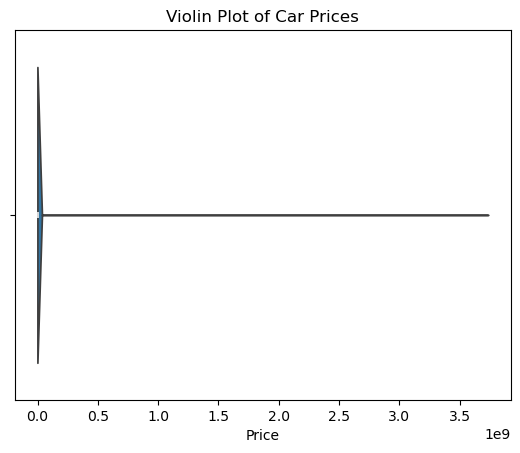

In [13]:
sns.violinplot(x=cars['price'])
plt.title('Violin Plot of Car Prices')
plt.xlabel('Price')
#plt.savefig('car_price_violinplot.png')
plt.savefig('../images/car_price_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

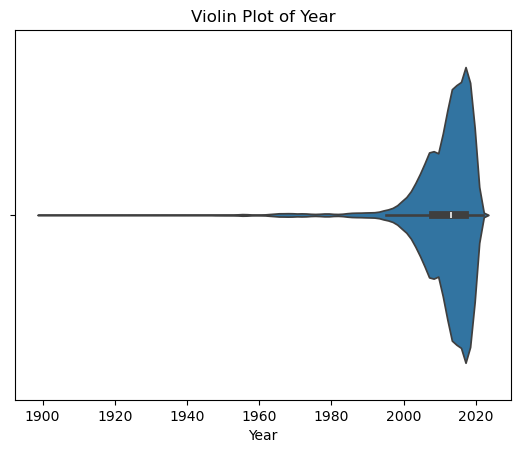

In [14]:
sns.violinplot(x=cars['year'])
plt.title('Violin Plot of Year')
plt.xlabel('Year')
#plt.savefig('car_price_violinplot.png')
plt.savefig('../images/car_price_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

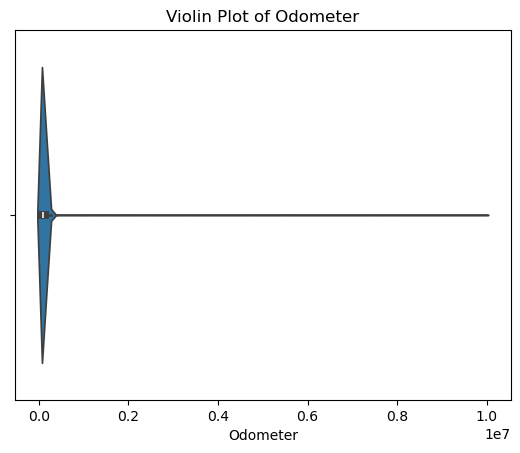

In [15]:
sns.violinplot(x=cars['odometer'])
plt.title('Violin Plot of Odometer')
plt.xlabel('Odometer')
#plt.savefig('car_odometer_violinplot.png')
plt.savefig('../images/car_odometer_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

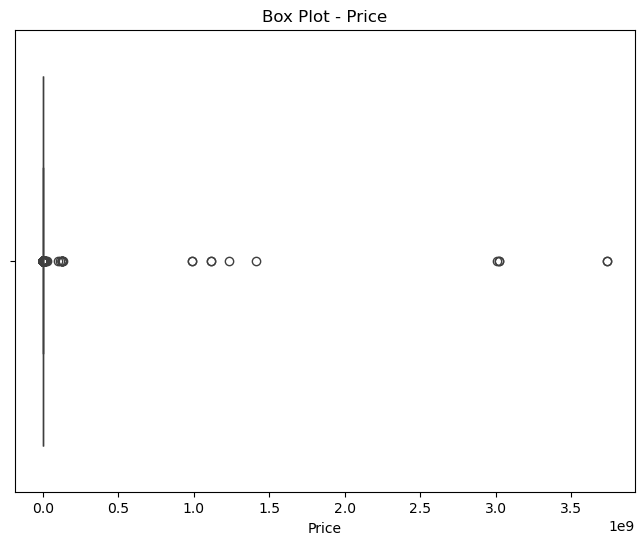

In [16]:
# BoxPlot Price data
# Plot a box plot for the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['price'])
plt.title('Box Plot - Price')
plt.xlabel('Price')
plt.savefig('car_price_boxplot.png')
#plt.savefig('../images/car_price_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

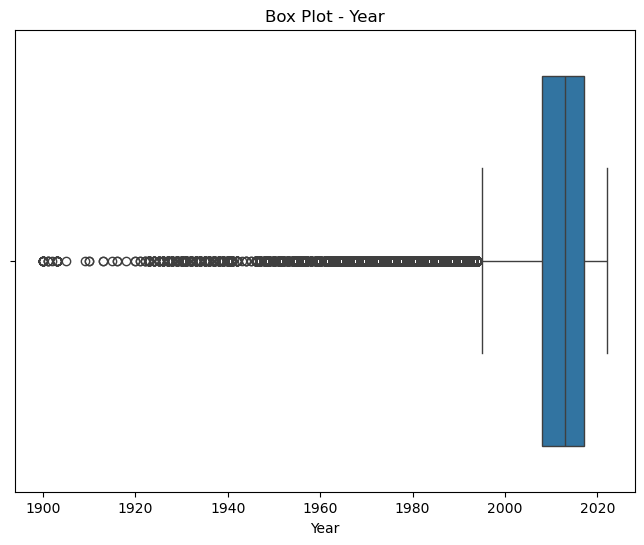

In [17]:
# BoxPlot year data
# Plot a box plot for the 'year' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['year'])
plt.title('Box Plot - Year')
plt.xlabel('Year')
#plt.savefig('car_year_boxplot.png')
plt.savefig('../images/car_year_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

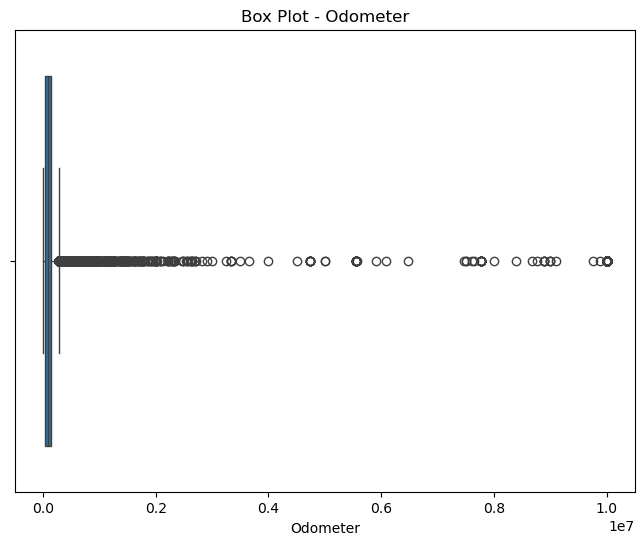

In [18]:
# BoxPlot Odometer data
# Plot a box plot for the 'odometer' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['odometer'])
plt.title('Box Plot - Odometer')
plt.xlabel('Odometer')
#plt.savefig('car_odometer_boxplot.png')
plt.savefig('../images/car_odometer_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [19]:
#Remove outliers for better visualization
cars_no_outliers = cars[cars['price'] < cars['price'].quantile(0.99)]  #inspecting 99% of the 'price' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['year'] < cars_no_outliers['price'].quantile(0.99)]  #inspecting 99% of the 'year' data
cars_no_outliers = cars_no_outliers[cars_no_outliers['odometer'] < cars_no_outliers['odometer'].quantile(0.99)]  #inspecting 99% of the 'odometer' data

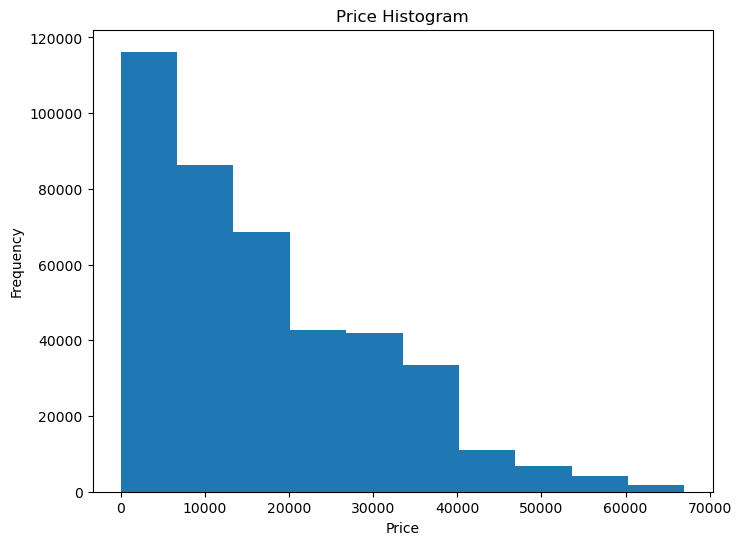

In [20]:
#Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['price'])
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.savefig('car_price_histogram.png')
plt.savefig('../images/car_price_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

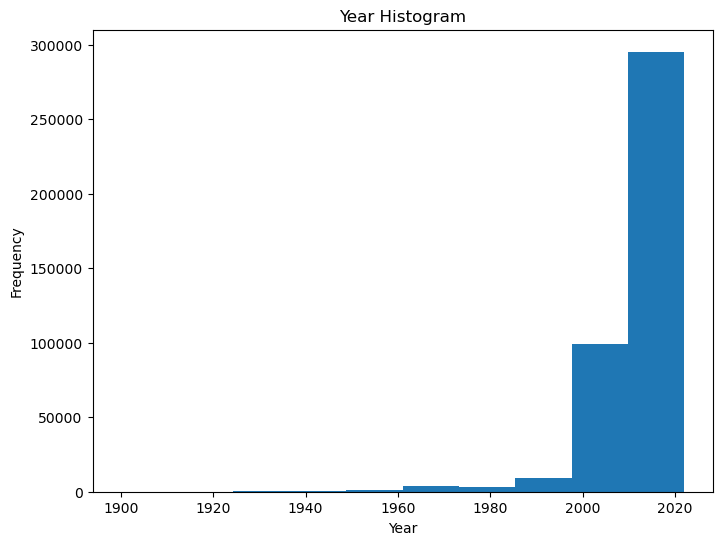

In [21]:
#Histogram of Year
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['year'])
plt.title('Year Histogram')
plt.xlabel('Year')
plt.ylabel('Frequency')
#plt.savefig('car_year_histogram.png')
plt.savefig('../images/car_year_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

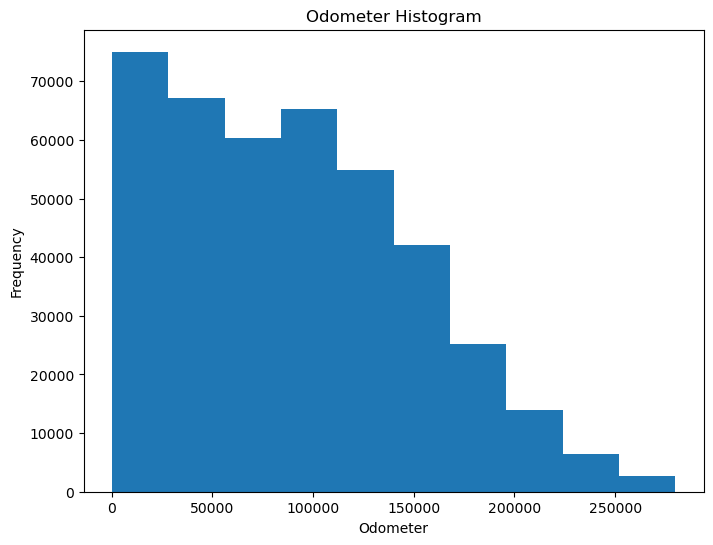

In [22]:
#Histogram of Odometer
plt.figure(figsize=(8, 6))
plt.hist(cars_no_outliers['odometer'])
plt.title('Odometer Histogram')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
#plt.savefig('car_odometer_histogram.png')
plt.savefig('../images/car_odometer_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

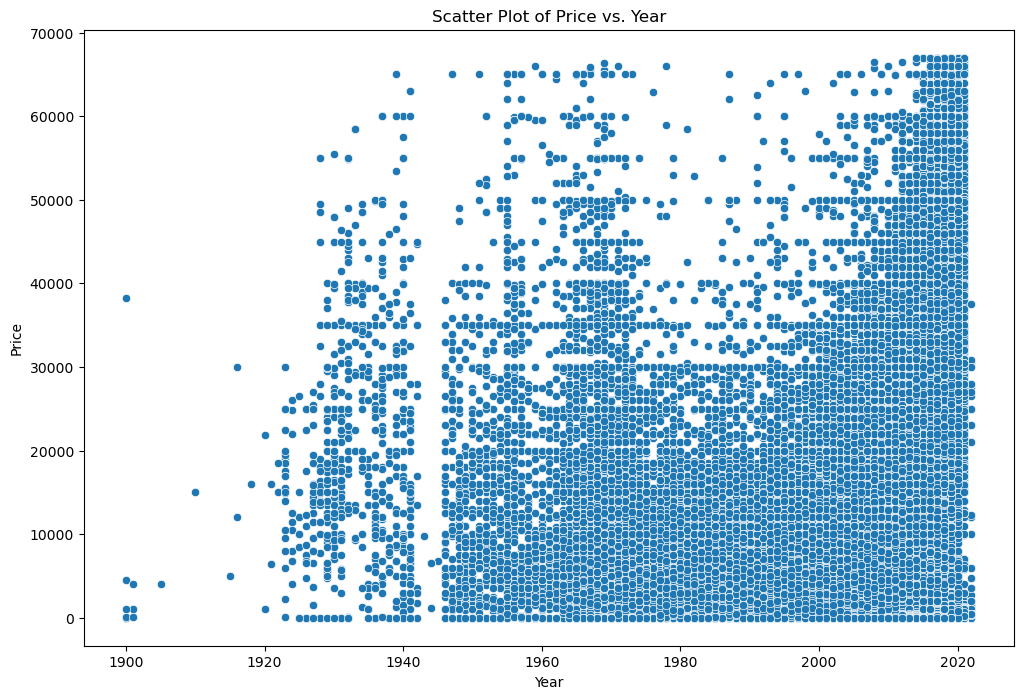

In [23]:
# Scatter plot of 'price' vs 'year'
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cars_no_outliers['year'], y=cars_no_outliers['price'])
plt.title('Scatter Plot of Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
#plt.savefig('car_price_year_scatterplot.png')
plt.savefig('../images/car_price_year_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

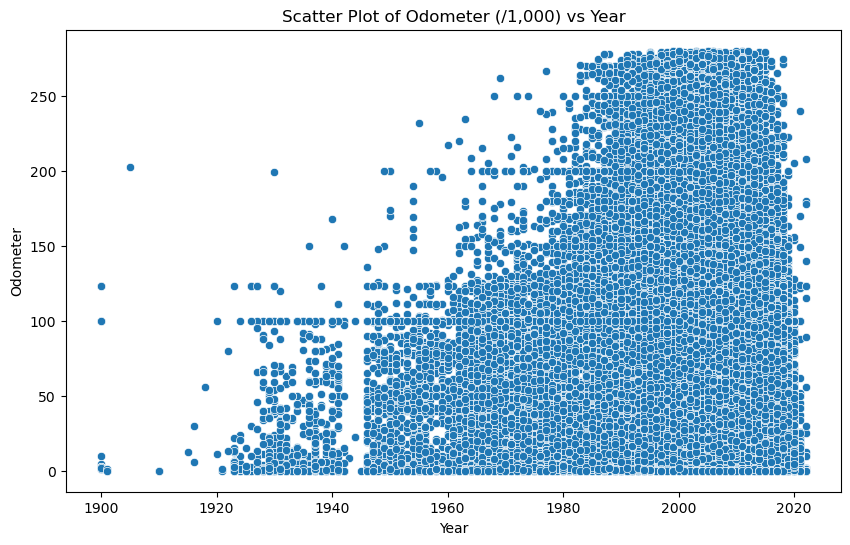

In [24]:
# Scatter plot of 'year' vs 'odometer'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cars_no_outliers['year'], y=(cars_no_outliers['odometer'])/1000)
plt.title('Scatter Plot of Odometer (/1,000) vs Year')
plt.xlabel('Year')
plt.ylabel('Odometer')
#plt.savefig('car_year_odometer_scatterplot.png')
plt.savefig('../images/car_year_odometer_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

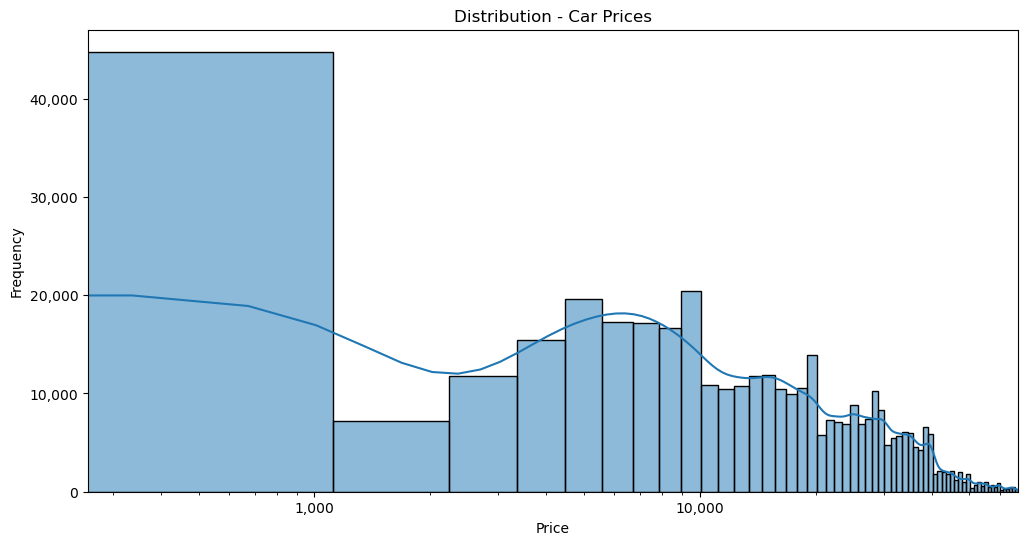

In [25]:
#Plot the distribution of prices on a Log scale from low to high prices
plt.figure(figsize=(12, 6))
sns.histplot(cars_no_outliers['price'], bins=60, kde=True)
plt.xscale('log')
plt.xlim(cars_no_outliers['price'].min(), cars_no_outliers['price'].max())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Distribution - Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.savefig('car_price_distribution.png')
plt.savefig('../images/car_price_distribution.png') #adjust folder when fisnihed using the GIT structure
plt.show()

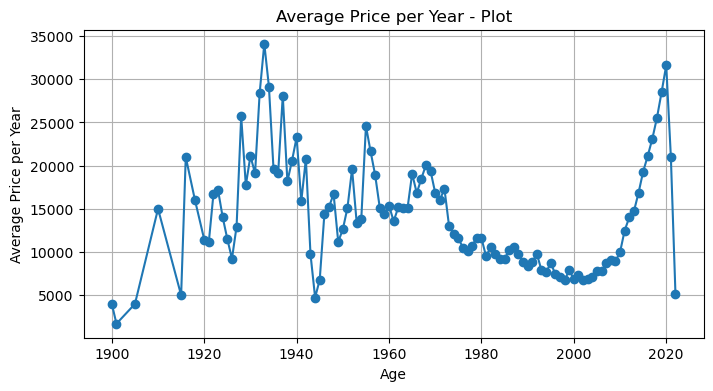

In [26]:
# Calculate mean price for each year group
avg_price_by_year = cars_no_outliers.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_price_by_year['year'], avg_price_by_year['price'], marker='o')  # 'o' adds points at each data point
plt.title('Average Price per Year - Plot')
plt.xlabel('Age')
plt.ylabel('Average Price per Year')
plt.grid(True)  # adds grid lines

# Save the plot to a PDF file
#plt.savefig('car_average_price_per_year_plot.png', format='png')
plt.savefig('../images/car_average_price_per_year_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [27]:
# Select the numeric columns
numeric_cols = ['price', 'odometer', 'year']

In [28]:
#Calculate covariance
car_cov = cars[numeric_cols].cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(car_cov)

Covariance Matrix:
                 price      odometer           year
price     1.484080e+14  2.627548e+10 -567917.359153
odometer  2.627548e+10  4.574530e+10 -318564.647869
year     -5.679174e+05 -3.185646e+05      89.342565


Correlation Matrix:
             price  odometer      year
price     1.000000  0.010032 -0.004925
odometer  0.010032  1.000000 -0.157215
year     -0.004925 -0.157215  1.000000


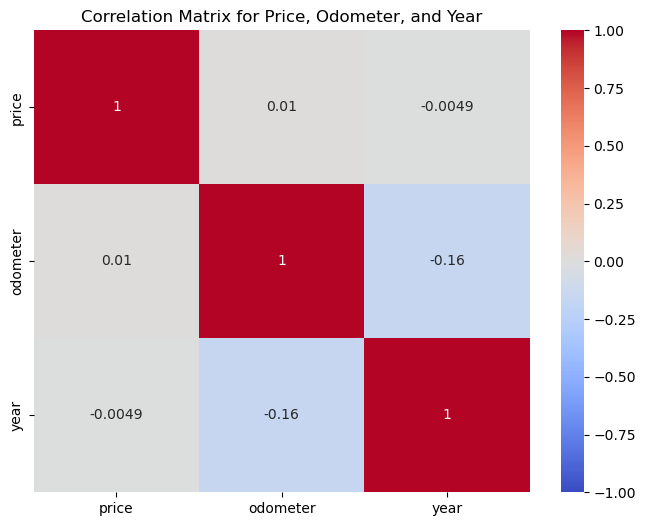

In [29]:
#Understand correlations and inspect contingency tables for numerical features: Price, Year, Odometer

# Calculate the correlation matrix
car_corr = cars[numeric_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(car_corr)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Price, Odometer, and Year')
#plt.savefig('car_correlation_matrix.png')
plt.savefig('../images/car_correlation_matrix.png') #adjust folder when fisnihed using the GIT structure
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [30]:
#Reload the original file
cars = pd.read_csv('C:/Users/mnkub/Desktop/csv/vehicles.csv')

In [31]:
#Initial length of dataset
initial_rows = len(cars)
initial_filesize = initial_rows
print("Initial file size =", initial_rows)

Initial file size = 426880


In [32]:
# Identify numeric columnsand categorical columns
numeric_cols = ['price', 'odometer', 'year']
categ_cols = cars.select_dtypes(include=['object']).columns

In [33]:
# Count distinct values in each categorical column
distinct_counts = cars[categ_cols].nunique()

# Print the results
print("\nDistinct Counts for Categorical Columns:")
for column, count in distinct_counts.items():
    print(f"{column}: {count}")


Distinct Counts for Categorical Columns:
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51


In [34]:
#Drop missing values (NaN) of Odometer, Year and Price
cars = cars.dropna(subset = numeric_cols)

rows_after_removed = len(cars)
print(f"NaN rows removed - price, year and odometer: {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

NaN rows removed - price, year and odometer: 5536


In [35]:
#Remove outliers (top 1% of price and odometer)
cars_price_outlier = cars['price'].quantile(0.99)
cars = cars[cars['price'] <= cars_price_outlier]

cars_odometer_outlier = cars['odometer'].quantile(0.99)
cars = cars[cars['odometer'] <= cars_odometer_outlier]

#Print results
rows_after_outliers_removed = len(cars)
print(f"Outlier rows removed - price and odometer: {initial_rows - rows_after_outliers_removed}")

Outlier rows removed - price and odometer: 8306


In [36]:
#Keep only rows where the price and odometer and year are positive
#Convert float to integer - odometer and year

#Price
cars = cars[cars['price'] > 0]
rows_after_removed = len(cars)
print(f"Rows removed where price is not positive: {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

#Odometer
cars = cars[cars['odometer'] > 0]
rows_after_removed = len(cars)
print(f"Rows removed where odometer is not positive: {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed
cars['odometer'] = cars['odometer'].astype(int)  #Convert the 'odometer' column from float to integer

#Year
cars = cars[cars['year'] > 0]
rows_after_removed = len(cars)
print(f"Rows removed where year is not positive: {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed
cars['year'] = cars['year'].astype(int)  #Convert the 'year' column from float to integer

#Year - distinct value
distinct_values = cars['year'].unique()  #get distinct values of the 'year' column
sorted_distinct_values = sorted(distinct_values)  #sort the distinct values in ascending order
#print('year', sorted_distinct_values, "\n")  #print the sorted distinct values and convert to integer

#Odometer - distinct value
distinct_values = cars['odometer'].unique()  #get distinct values of the 'year' column
sorted_distinct_values = sorted(distinct_values)  #sort the distinct values in ascending order
#print('odometer', sorted_distinct_values, "\n")  #print the sorted distinct values and convert to integer

Rows removed where price is not positive: 38827
Rows removed where odometer is not positive: 1085
Rows removed where year is not positive: 0


In [37]:
#Remove "Unknown" data -- notna() function

#Transmission
cars = cars[(cars['transmission'].notna())]  #delete missing lines
#cars['transmission'] = cars['transmission'].fillna('unknown')  #replace NaN with "unknown"

rows_after_removed = len(cars)
print(f"Unknown rows removed - transmission {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

#Manufacturer
cars = cars[(cars['manufacturer'].notna())]  #delete missing lines
#cars['manufacturer'] = cars['manufacturer'].fillna('unknown')  #replace NaN with "unknown"
rows_after_removed = len(cars)
print(f"Unknown rows removed - manufacturer {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

#Fuel
cars = cars[(cars['fuel'].notna())]  #delete missing lines
#cars['fuel'] = cars['fuel'].fillna('unknown')  #replace NaN with "unknown"
rows_after_removed = len(cars)
print(f"Unknown rows removed - fuel {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

#Title status
cars = cars[(cars['title_status'].notna())]  #delete missing lines
#cars['title_status'] = cars['title_status'].fillna('unknown')  #replace NaN with "unknown"
rows_after_removed = len(cars)
print(f"Unknown rows removed - title_status {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

#Model
cars = cars[(cars['model'].notna())]  #delete missing lines
#cars['model'] = cars['model'].fillna('unknown')  #replace NaN with "unknown"
rows_after_removed = len(cars)
print(f"Unknown rows removed - model {initial_rows - rows_after_removed}")
initial_rows = rows_after_removed

Unknown rows removed - transmission 1485
Unknown rows removed - manufacturer 13480
Unknown rows removed - fuel 1875
Unknown rows removed - title_status 6287
Unknown rows removed - model 4214


In [38]:
#Verifiy distinct values and correct them - commands: fillna, replace, to_numeric
#Condition
cars['condition'] = cars['condition'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['condition'].unique()
print('condition', distinct_values, "\n")

#Cylinders
cars['cylinders'] = cars['cylinders'].fillna('unknown')  #replace NaN with "unknown"
cars['cylinders'] = cars['cylinders'].replace('other', 'unknown')  #replace "other" with "unknown"
cars = cars[cars['cylinders'] != 'unknown'].copy()  #drop rows where cylinders = 'unknown'
cars['cylinders'] = cars['cylinders'].str.replace('cylinders', '').str.strip()  #remove word cylinders and keep only numbers
cars['cylinders'] = pd.to_numeric(cars['cylinders'], errors='coerce')  #convert values to numeric
distinct_values = cars['cylinders'].unique()
print('cylinders', distinct_values, "\n")

#Fuel
cars['fuel'] = cars['fuel'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['fuel'].unique()
print('fuel', distinct_values, "\n")

#VIN
cars['VIN'] = cars['VIN'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['VIN'].unique()
print('VIN', distinct_values, "\n")

#Drive
cars['drive'] = cars['drive'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['drive'].unique()
print('drive', distinct_values, "\n")

#Size
cars['size'] = cars['size'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['size'].unique()
print('size', distinct_values, "\n")

#Type
cars['type'] = cars['type'].fillna('unknown')  #replace NaN with "unknown"
cars['type'] = cars['type'].replace('other', 'unknown')  #replace "other" with "unknown"
distinct_values = cars['type'].unique()
print('type', distinct_values, "\n")

#Paint Color
cars['paint_color'] = cars['paint_color'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['paint_color'].unique()
print('paint_color', distinct_values, "\n")

#State
cars['state'] = cars['state'].fillna('unknown')  #replace NaN with "unknown"
distinct_values = cars['state'].unique()
print('state', distinct_values, "\n")

condition ['good' 'excellent' 'fair' 'like new' 'new' 'unknown' 'salvage'] 

cylinders [ 8  6  4  5 10  3 12] 

fuel ['gas' 'diesel' 'other' 'hybrid' 'electric'] 

VIN ['3GTP1VEC4EG551563' '1GCSCSE06AZ123805' '3GCPWCED5LG130317' ...
 '2HGES15535H620534' '1FDWF37P64EA24868' 'SAJGX2749VCOO8376'] 

drive ['unknown' 'rwd' '4wd' 'fwd'] 

size ['unknown' 'full-size' 'mid-size' 'compact' 'sub-compact'] 

type ['pickup' 'truck' 'unknown' 'coupe' 'mini-van' 'SUV' 'sedan' 'hatchback'
 'offroad' 'convertible' 'wagon' 'van' 'bus'] 

paint_color ['white' 'blue' 'red' 'black' 'silver' 'grey' 'unknown' 'brown' 'yellow'
 'green' 'custom' 'purple' 'orange'] 

state ['al' 'ak' 'az' 'ar' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'id' 'il'
 'in' 'ia' 'ks' 'ky' 'la' 'me' 'md' 'ma' 'mi' 'mn' 'ms' 'mo' 'mt' 'nc'
 'ne' 'nv' 'nj' 'nm' 'ny' 'nh' 'nd' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'vt' 'va' 'wa' 'wv' 'wi' 'wy'] 



In [39]:
#Verifiy price values and quantities - extreme LOW values
row_count = cars[cars['price'] < 1000].shape[0]
print("Number of rows <1000:", row_count)

row_count = cars[cars['price'] < 500].shape[0]
print("Number of rows <500:", row_count)

row_count = cars[cars['price'] < 100].shape[0]
print("Number of rows <100:", row_count)

row_count = cars[cars['price'] < 10].shape[0]
print("Number of rows <10:", row_count)

#Verifying outliers for numerical features
print('price - max =', max(cars['price']))
print('price - min =', min(cars['price']))

Number of rows <1000: 6395
Number of rows <500: 4776
Number of rows <100: 1341
Number of rows <10: 1080
price - max = 66788
price - min = 1


In [40]:
## Delete rows with outliers from numeric features - extreme LOW values
# Delete rows where 'price' is below 1,000
cars = cars[cars['price'] >= 1000]
print(len(cars))

# Delete rows where 'year' is before 1970
cars = cars[cars['year'] >= 1970]
print(len(cars))

202697
200677


In [41]:
# Check for missing values
missing_values = cars.isnull().sum()
print("\nMissing Values:", missing_values)


Missing Values: id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [42]:
#CLEANSED DATA
#Inspect cleased dataframe
cars.head(10)

id  region  price  year manufacturer                        model  \
27  7316814884  auburn  33590  2014          gmc     sierra 1500 crew cab slt   
28  7316814758  auburn  22590  2010    chevrolet               silverado 1500   
29  7316814989  auburn  39590  2020    chevrolet          silverado 1500 crew   
30  7316743432  auburn  30990  2017       toyota         tundra double cab sr   
31  7316356412  auburn  15000  2013         ford                    f-150 xlt   
32  7316343444  auburn  27990  2012          gmc  sierra 2500 hd extended cab   
33  7316304717  auburn  34590  2016    chevrolet        silverado 1500 double   
34  7316285779  auburn  35000  2019       toyota                       tacoma   
35  7316257769  auburn  29990  2016    chevrolet        colorado extended cab   
36  7316133914  auburn  38590  2011    chevrolet         corvette grand sport   

    condition  cylinders fuel  odometer title_status transmission  \
27       good          8  gas     57923        clean        other   
28       good          8  gas     71229        clean        other   
29       good          8  gas     19160        clean        other   
30       good          8  gas     41124        clean        other   
31  excellent          6  gas    128000        clean    automatic   
32       good          8  gas     68696        clean        other   
33       good          6  gas     29499        clean        other   
34  excellent          6  gas     43000        clean    automatic   
35       good          6  gas     17302        clean        other   
36       good          8  gas     30237        clean        other   

                  VIN    drive       size     type paint_color state  
27  3GTP1VEC4EG551563  unknown    unknown   pickup       white    al  
28  1GCSCSE06AZ123805  unknown    unknown   pickup        blue    al  
29  3GCPWCED5LG130317  unknown    unknown   pickup         red    al  
30  5TFRM5F17HX120972  unknown    unknown   pickup         red    al  
31            unknown      rwd  full-size    truck       black    al  
32  1GT220CG8CZ231238      4wd    unknown   pickup       black    al  
33  1GCVKREH6GZ228691      4wd    unknown   pickup      silver    al  
34            unknown      4wd    unknown    truck        grey    al  
35  1GCHTCE37G1186784      4wd    unknown   pickup         red    al  
36  1G1YR3DW3B5102190      rwd    unknown  unknown         red    al

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200677 entries, 27 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            200677 non-null  int64 
 1   region        200677 non-null  object
 2   price         200677 non-null  int64 
 3   year          200677 non-null  int32 
 4   manufacturer  200677 non-null  object
 5   model         200677 non-null  object
 6   condition     200677 non-null  object
 7   cylinders     200677 non-null  int64 
 8   fuel          200677 non-null  object
 9   odometer      200677 non-null  int32 
 10  title_status  200677 non-null  object
 11  transmission  200677 non-null  object
 12  VIN           200677 non-null  object
 13  drive         200677 non-null  object
 14  size          200677 non-null  object
 15  type          200677 non-null  object
 16  paint_color   200677 non-null  object
 17  state         200677 non-null  object
dtypes: int32(2), int64(3), objec

In [44]:
cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [45]:
# Final number of rows of the cleansed dataframe
final_rows = len(cars)
print(f"Number of rows in dataframe: {final_rows}")
print(f"Original file size: {initial_filesize}")
percentage_retained = round((final_rows / initial_filesize) * 100, 2)
print(f"Percent of Dataframe Retained (Rows Not Removed): {percentage_retained:.2f}%")

Number of rows in dataframe: 200677
Original file size: 426880
Percent of Dataframe Retained (Rows Not Removed): 47.01%


In [46]:
# Count distinct values in each categorical column after data cleasing
distinct_counts = cars[categ_cols].nunique()

# Print distinct values
print("\nDistinct Counts for Categorical Columns:")
for column, count in distinct_counts.items():
    print(f"{column}: {count}")


Distinct Counts for Categorical Columns:
region: 404
manufacturer: 41
model: 14577
condition: 7
cylinders: 7
fuel: 5
title_status: 6
transmission: 3
VIN: 55241
drive: 4
size: 5
type: 13
paint_color: 13
state: 51


In [47]:
#Verifiy distinct values of the cleansed dataframe
#Distinct Values for Categorical Variables

#Region
distinct_values = cars['region'].unique()
print('region:', distinct_values, "\n")

#Manufacturer
distinct_values = cars['manufacturer'].unique()
print('manufacturer:', distinct_values, "\n")

#Model
distinct_values = cars['model'].unique()
print('model:', distinct_values, "\n")

#Condition
distinct_values = cars['condition'].unique()
print('condition:', distinct_values, "\n")

#Cylinders
distinct_values = cars['cylinders'].unique()
print('cylinders:', distinct_values, "\n")

#Fuel
distinct_values = cars['fuel'].unique()
print('fuel:', distinct_values, "\n")

#title_status
distinct_values = cars['title_status'].unique()
print('title_status:', distinct_values, "\n")

#Transmission
distinct_values = cars['transmission'].unique()
print('transmission:', distinct_values, "\n")

#Drive
distinct_values = cars['drive'].unique()
print('drive:', distinct_values, "\n")

#Size
distinct_values = cars['size'].unique()
print('size:', distinct_values, "\n")

#Type
distinct_values = cars['type'].unique()
print('type:', distinct_values, "\n")

#Paint Color
distinct_values = cars['paint_color'].unique()
print('paint_color:', distinct_values, "\n")

#State
distinct_values = cars['state'].unique()
print('state:', distinct_values, "\n")

region: ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'northwest CT' 'washington,

In [48]:
#CLEANSED DATA
#Plot cleased data

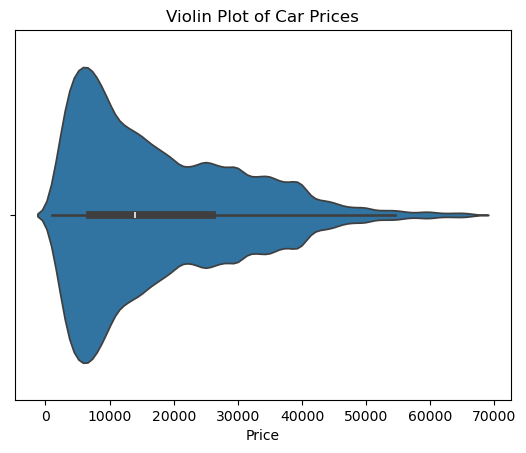

In [49]:
#Violin Plot - Price
sns.violinplot(x=cars['price'])
plt.title('Violin Plot of Car Prices')
plt.xlabel('Price')
#plt.savefig('car_price_violinplot.png')
plt.savefig('../images/car_price_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

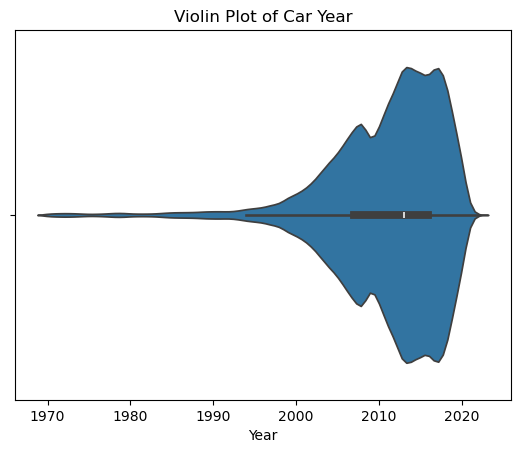

In [50]:
#Violin Plot - Year
sns.violinplot(x=cars['year'])
plt.title('Violin Plot of Car Year')
plt.xlabel('Year')
#plt.savefig('car_year_violinplot.png')
plt.savefig('../images/car_year_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

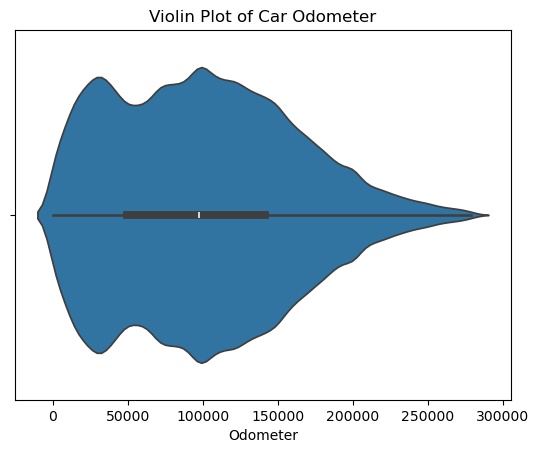

In [51]:
#Violin Plot - Odometer
sns.violinplot(x=cars['odometer'])
plt.title('Violin Plot of Car Odometer')
plt.xlabel('Odometer')
#plt.savefig('car_odometer_violinplot.png')
plt.savefig('../images/car_odometer_violinplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

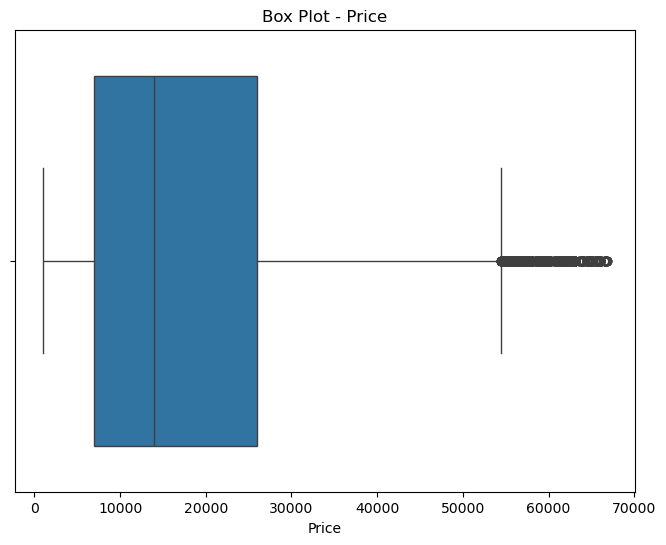

In [52]:
# BoxPlot Price data
# Plot a box plot for the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['price'])
plt.title('Box Plot - Price')
plt.xlabel('Price')
#plt.savefig('car_price_boxplot.png')
plt.savefig('../images/car_price_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

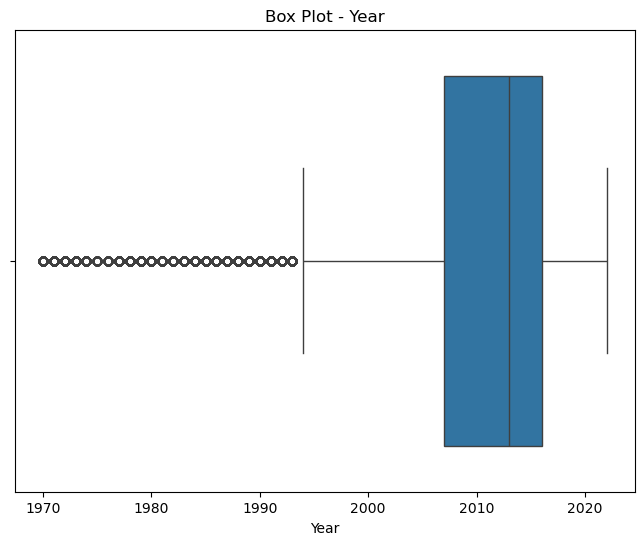

In [53]:
# BoxPlot year data
# Plot a box plot for the 'year' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['year'])
plt.title('Box Plot - Year')
plt.xlabel('Year')
plt.savefig('car_year_boxplot.png')
#plt.savefig('../images/car_year_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

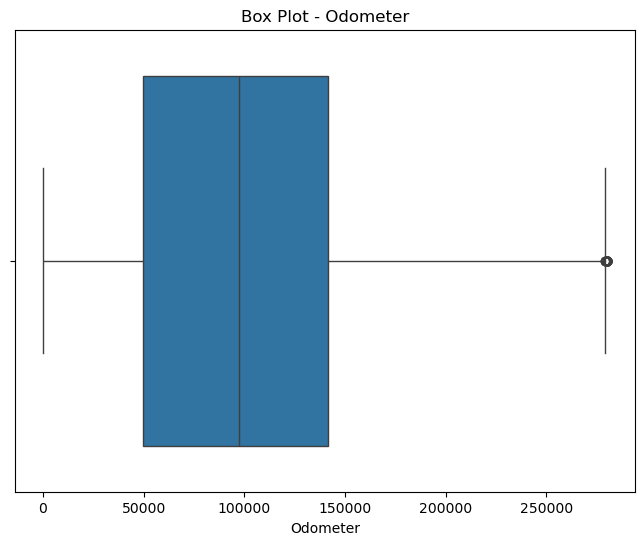

In [54]:
# BoxPlot Odometer data
# Plot a box plot for the 'odometer' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['odometer'])
plt.title('Box Plot - Odometer')
plt.xlabel('Odometer')
#plt.savefig('car_odometer_boxplot.png')
plt.savefig('../images/car_odometer_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

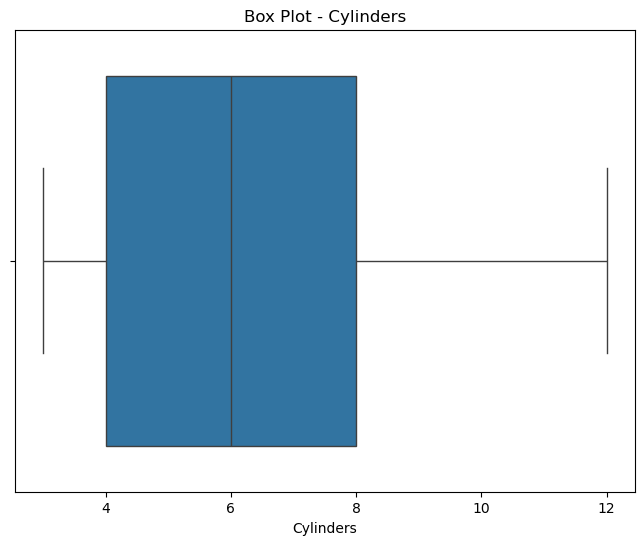

In [55]:
# BoxPlot Cylinders data
# Plot a box plot for the 'odometer' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=cars['cylinders'])
plt.title('Box Plot - Cylinders')
plt.xlabel('Cylinders')
#plt.savefig('car_cylinders_boxplot.png')
plt.savefig('../images/car_cylinders_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

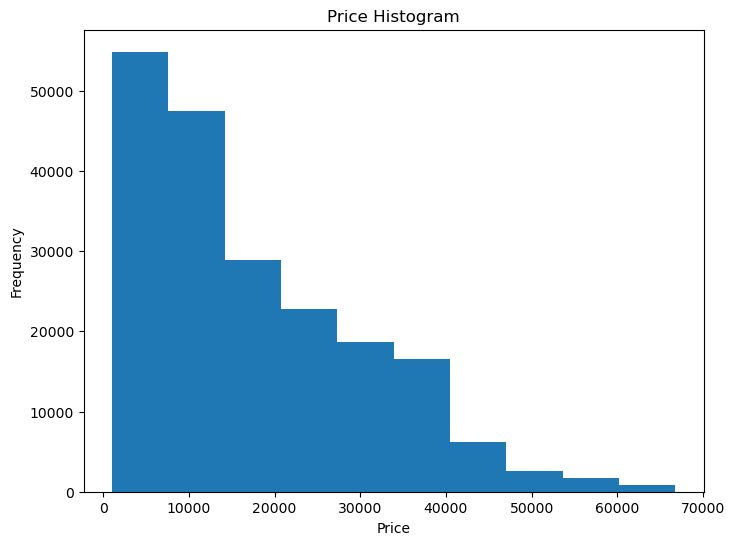

In [56]:
#Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(cars['price'])
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.savefig('car_price_histogram.png')
plt.savefig('../images/car_price_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

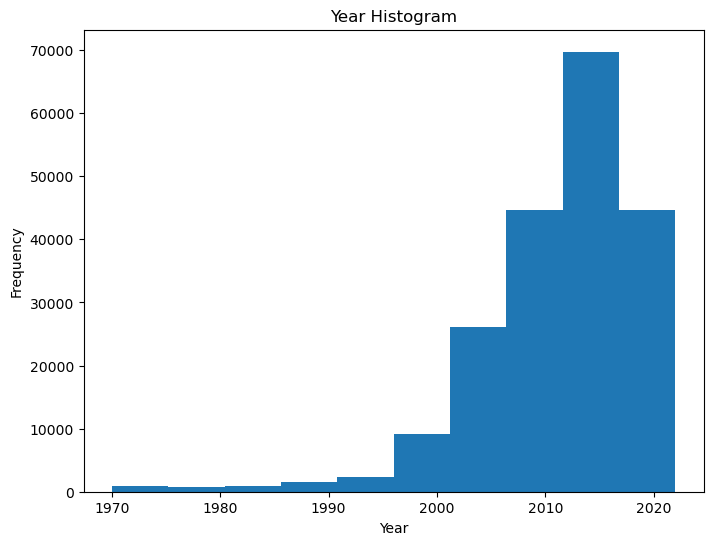

In [57]:
#Histogram of Year
plt.figure(figsize=(8, 6))
plt.hist(cars['year'])
plt.title('Year Histogram')
plt.xlabel('Year')
plt.ylabel('Frequency')
#plt.savefig('car_year_histogram.png')
plt.savefig('../images/car_year_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

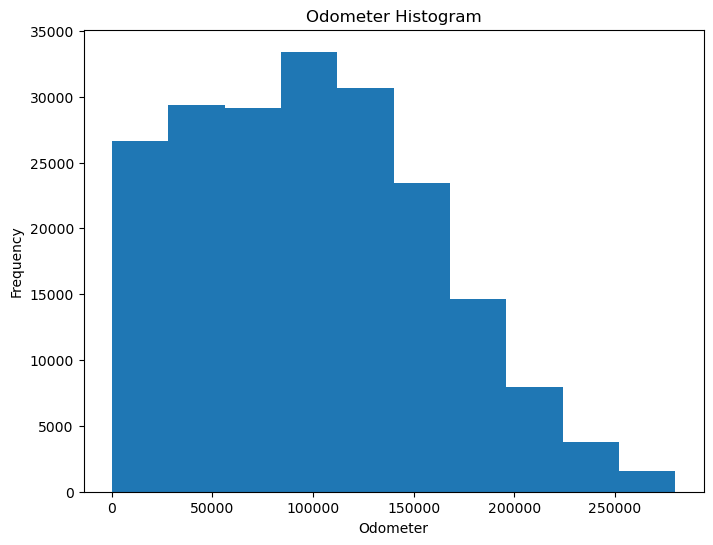

In [58]:
#Histogram of Odometer
plt.figure(figsize=(8, 6))
plt.hist(cars['odometer'])
plt.title('Odometer Histogram')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
#plt.savefig('car_odometer_histogram.png')
plt.savefig('../images/car_odometer_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

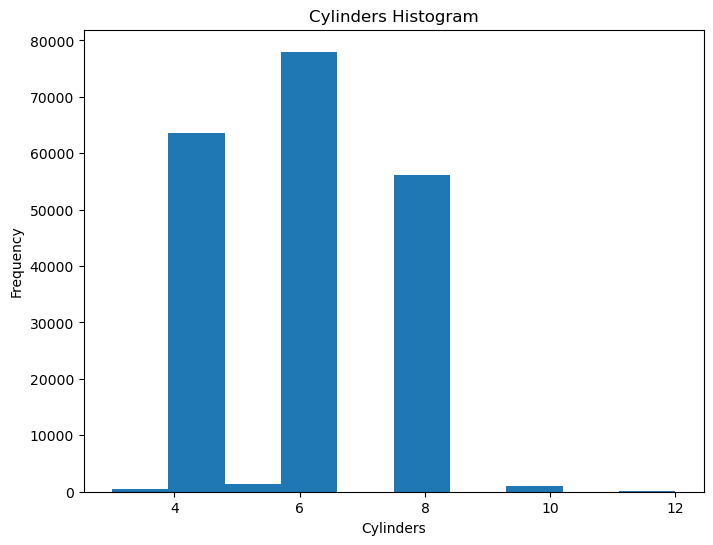

In [59]:
#Histogram of Cylinders
plt.figure(figsize=(8, 6))
plt.hist(cars['cylinders'])
plt.title('Cylinders Histogram')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
#plt.savefig('car_cylinders_histogram.png')
plt.savefig('../images/car_cylinders_histogram.png') #adjust folder when fisnihed using the GIT structure
plt.show()

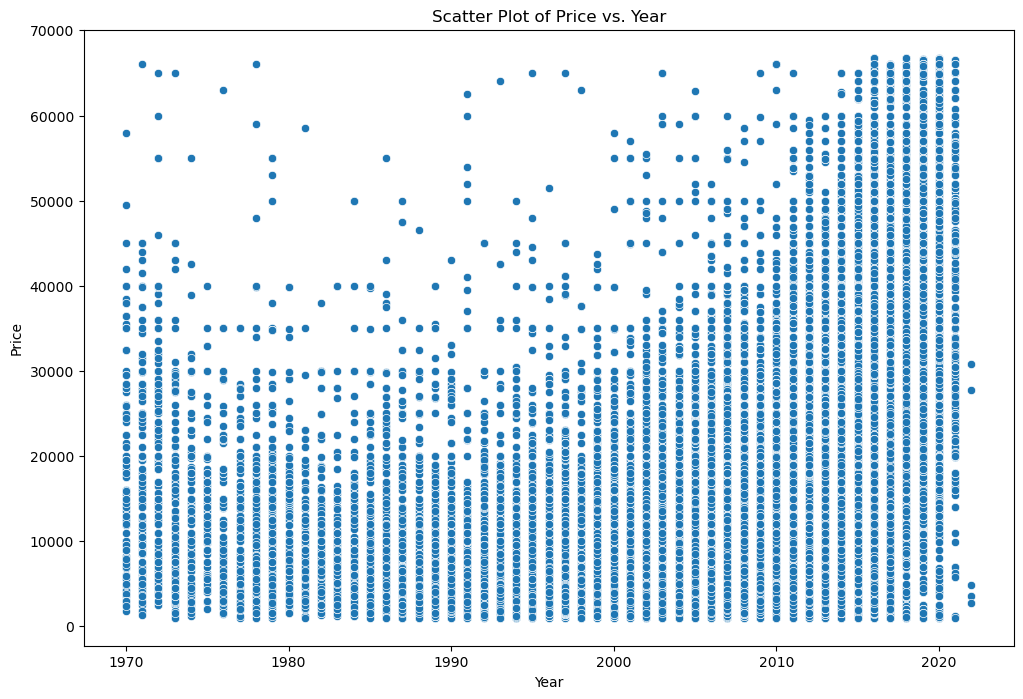

In [60]:
# Scatter plot of 'price' vs 'year'
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cars['year'], y=cars['price'])
plt.title('Scatter Plot of Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
#plt.savefig('car_price_year_scatterplot.png')
plt.savefig('../images/car_price_year_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

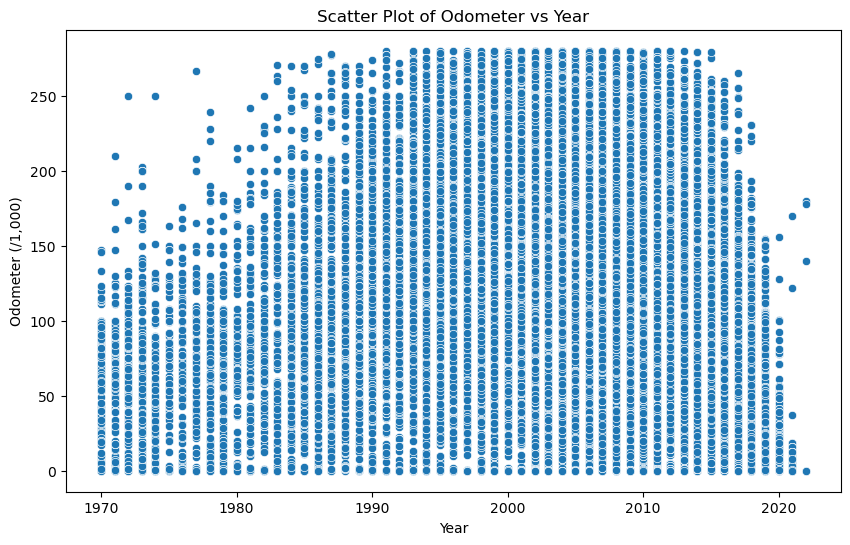

In [61]:
# Scatter plot of 'year' vs 'odometer'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cars['year'], y=(cars['odometer'])/1000)
plt.title('Scatter Plot of Odometer vs Year')
plt.xlabel('Year')
plt.ylabel('Odometer (/1,000)')
#plt.savefig('car_year_odometer_scatterplot.png')
plt.savefig('../images/car_year_odometer_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

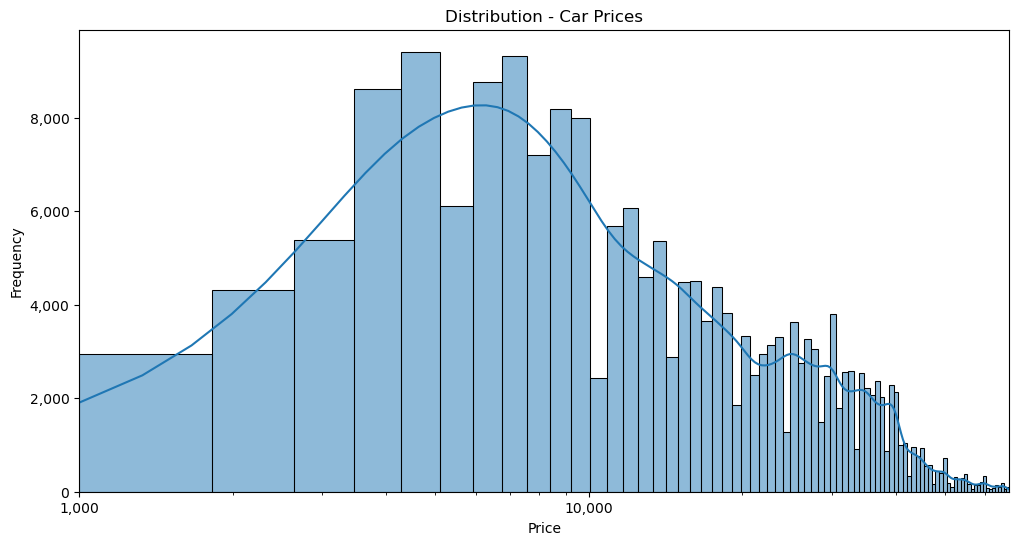

In [62]:
#Plot the distribution of prices on a Log scale from low to high prices
plt.figure(figsize=(12, 6))
sns.histplot(cars['price'], bins=80, kde=True)
plt.xscale('log')
plt.xlim(cars['price'].min(), cars['price'].max())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Distribution - Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.savefig('car_price_distribution.png')
plt.savefig('../images/car_price_distribution.png') #adjust folder when fisnihed using the GIT structure
plt.show()

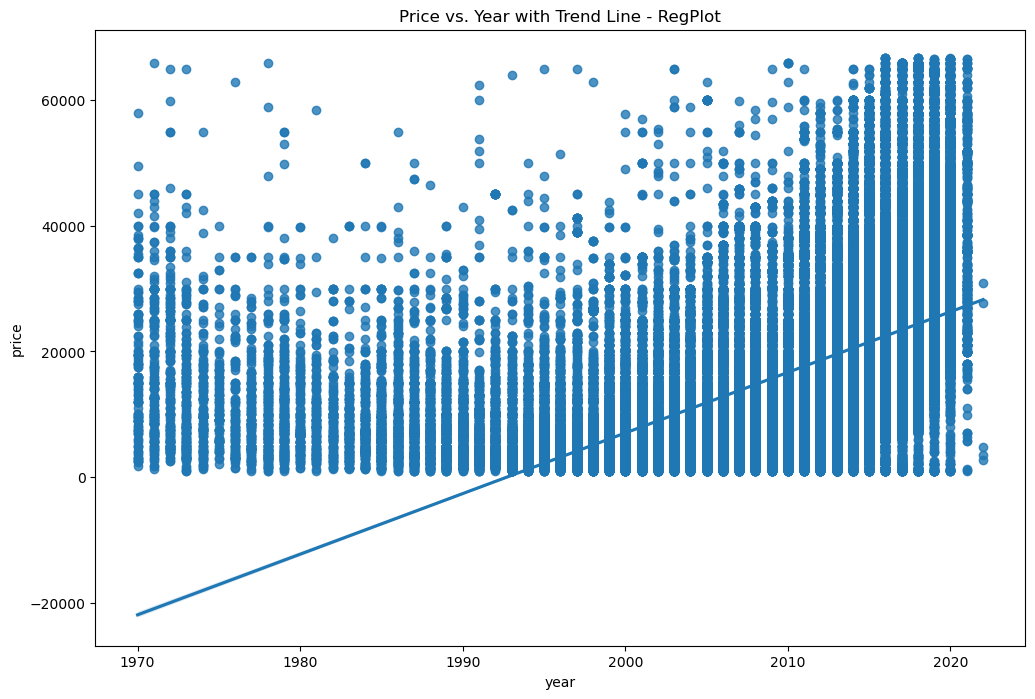

In [63]:
# Line RegPlot using seaborn - Price vs. Year
plt.figure(figsize=(12, 8))
sns.regplot(data=cars, x='year', y='price')
plt.title('Price vs. Year with Trend Line - RegPlot')
#plt.savefig('car_price_year_regplot.png', format='png')
plt.savefig('../images/car_price_year_regplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

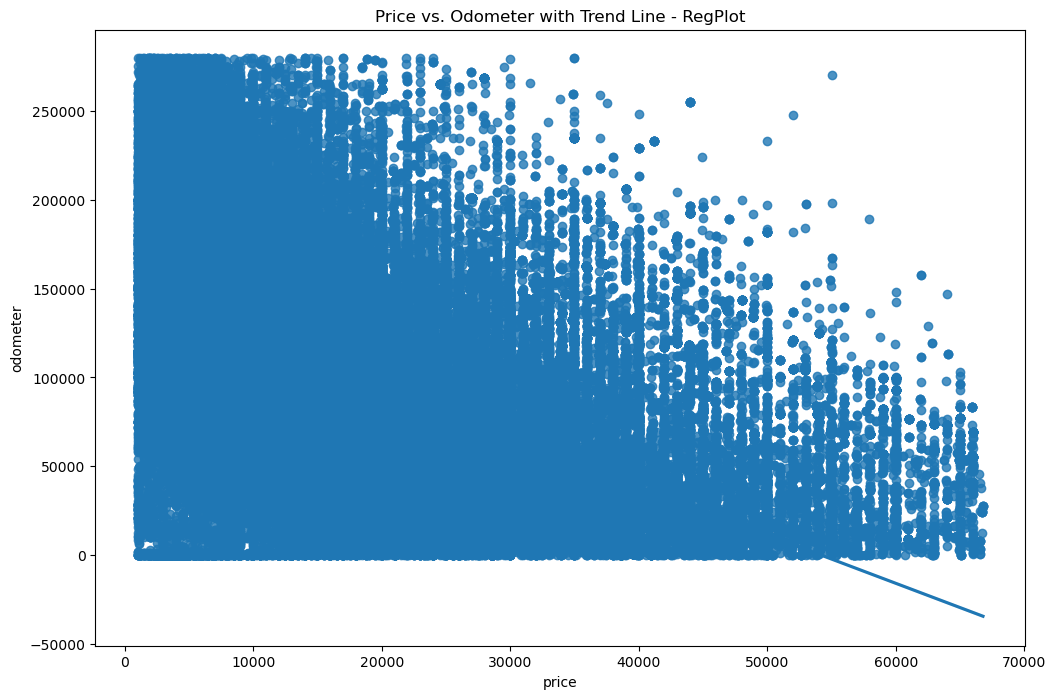

In [64]:
# Line RegPlot using seaborn - Price vs. Odometer
plt.figure(figsize=(12, 8))
sns.regplot(data=cars, x='price', y='odometer')
plt.title('Price vs. Odometer with Trend Line - RegPlot')
#plt.savefig('car_price_odometer_regplot.png', format='png')
plt.savefig('../images/car_price_odometer_regplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

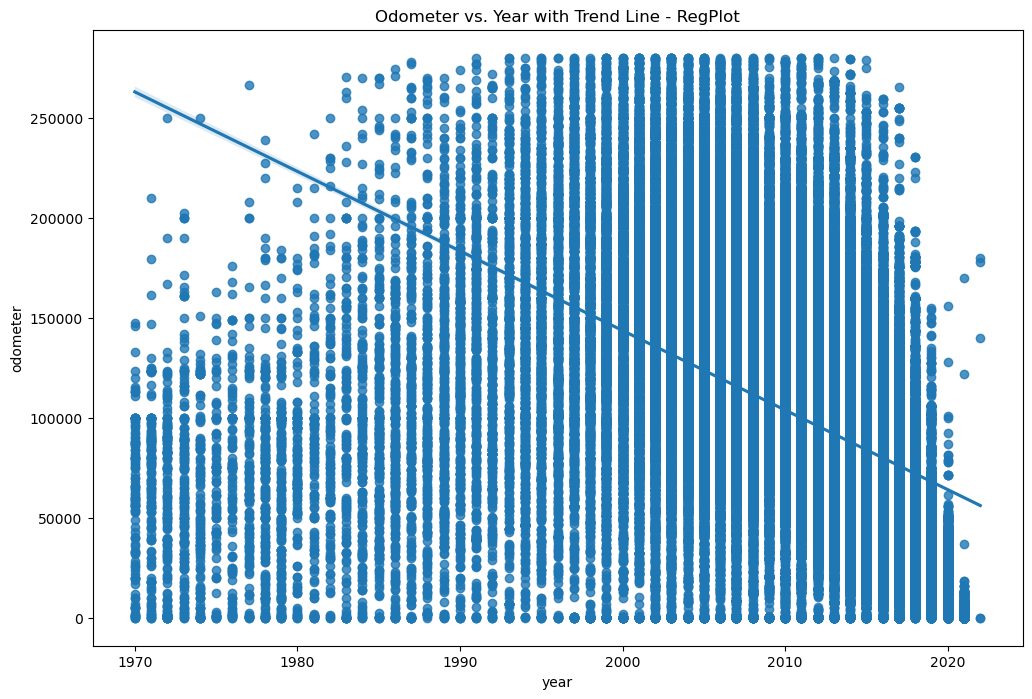

In [65]:
# Line RegPlot using seaborn - Year vs. Odometer
plt.figure(figsize=(12, 8))
sns.regplot(data=cars, x='year', y='odometer')
plt.title('Odometer vs. Year with Trend Line - RegPlot')
#plt.savefig('car_odometer_year_regplot.png', format='png')
plt.savefig('../images/car_odometer_year_regplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

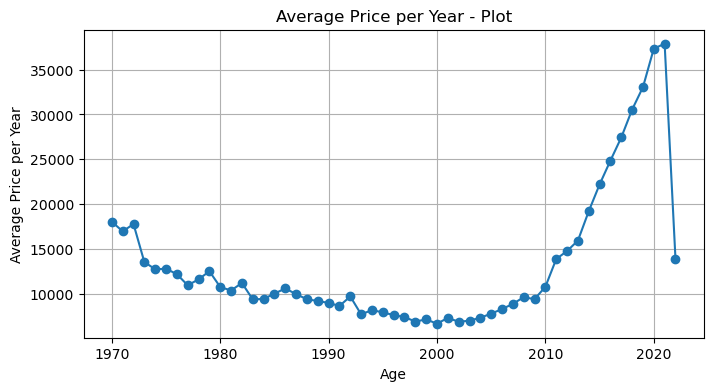

In [66]:
# Calculate average (mean) price for each year
avg_price_by_year = cars.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_price_by_year['year'], avg_price_by_year['price'], marker='o')  # 'o' adds points at each data point
plt.title('Average Price per Year - Plot')
plt.xlabel('Age')
plt.ylabel('Average Price per Year')
plt.grid(True)  # adds grid lines
#plt.savefig('car_average_price_per_year_plot.png', format='png')
plt.savefig('../images/car_average_price_per_year_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [67]:
# Select the numeric columns.
numeric_cols = ['price', 'odometer', 'year']

In [68]:
#Calculate covariance
car_cov = cars[numeric_cols].cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(car_cov)

Covariance Matrix:
                 price      odometer           year
price     1.669391e+08 -4.559514e+08   48860.621821
odometer -4.559514e+08  3.597074e+09 -201257.631019
year      4.886062e+04 -2.012576e+05      50.598187


Correlation Matrix:
             price  odometer      year
price     1.000000 -0.588389  0.531634
odometer -0.588389  1.000000 -0.471748
year      0.531634 -0.471748  1.000000


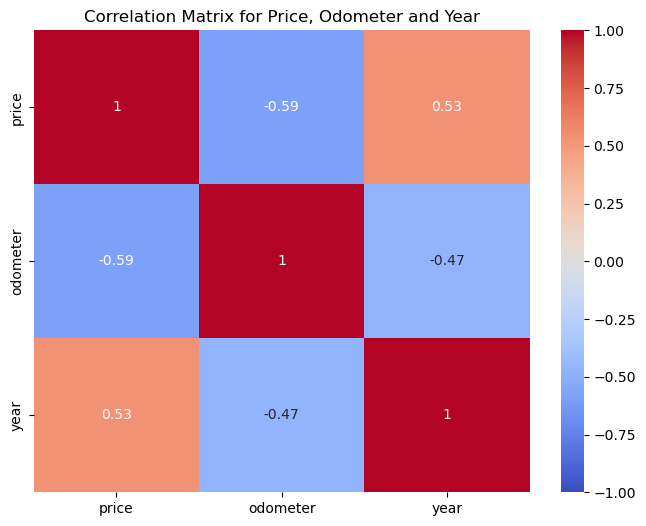

In [69]:
#Cleansed Data
#Understand correlations and inspect contingency tables for numerical features: Price, Year, Odometer

# Calculate the correlation matrix
car_corr = cars[numeric_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(car_corr)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(car_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Price, Odometer and Year')
#plt.savefig('car_correlation_matrix.png')
plt.savefig('../images/car_correlation_matrix.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [70]:
cars.head()

id  region  price  year manufacturer                     model  \
27  7316814884  auburn  33590  2014          gmc  sierra 1500 crew cab slt   
28  7316814758  auburn  22590  2010    chevrolet            silverado 1500   
29  7316814989  auburn  39590  2020    chevrolet       silverado 1500 crew   
30  7316743432  auburn  30990  2017       toyota      tundra double cab sr   
31  7316356412  auburn  15000  2013         ford                 f-150 xlt   

    condition  cylinders fuel  odometer title_status transmission  \
27       good          8  gas     57923        clean        other   
28       good          8  gas     71229        clean        other   
29       good          8  gas     19160        clean        other   
30       good          8  gas     41124        clean        other   
31  excellent          6  gas    128000        clean    automatic   

                  VIN    drive       size    type paint_color state  
27  3GTP1VEC4EG551563  unknown    unknown  pickup       white    al  
28  1GCSCSE06AZ123805  unknown    unknown  pickup        blue    al  
29  3GCPWCED5LG130317  unknown    unknown  pickup         red    al  
30  5TFRM5F17HX120972  unknown    unknown  pickup         red    al  
31            unknown      rwd  full-size   truck       black    al

In [71]:
#Save X-test dataset with original values for plotting purposes
features= ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
X_cars = (cars[features])
y_cars = cars['price']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_cars, y_cars, test_size=0.3, random_state=42)
print(X_test_orig)

        year  odometer  cylinders manufacturer  condition    fuel  \
289241  2009    183812          8    chevrolet    unknown     gas   
194953  2017     46748          6        buick       good   other   
46245   2015     81171          4      hyundai  excellent     gas   
129667  2018     30169          4       toyota   like new     gas   
65438   2005    116000          8          gmc  excellent  diesel   
...      ...       ...        ...          ...        ...     ...   
218585  2012    185225          6       toyota       good     gas   
190345  2006    106000          8         ford  excellent     gas   
119424  2016      9704          8    chevrolet       good     gas   
388577  2020     45421          4       toyota  excellent     gas   
338510  2012     91146          4        honda   like new     gas   

       title_status transmission    drive       size   type paint_color  
289241        clean    automatic      4wd    unknown  truck        blue  
194953        clean    

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [72]:
#Features (X_cars) and Target Variable (y_cars)
features = ['year', 'odometer', 'cylinders']
X_cars = cars[features]
y_cars = cars['price']

In [73]:
#Encoding categorical variables
categ_cols = cars.select_dtypes(include=['object']).columns

for column in categ_cols:
    cars[column] = cars[column].astype('category').cat.codes

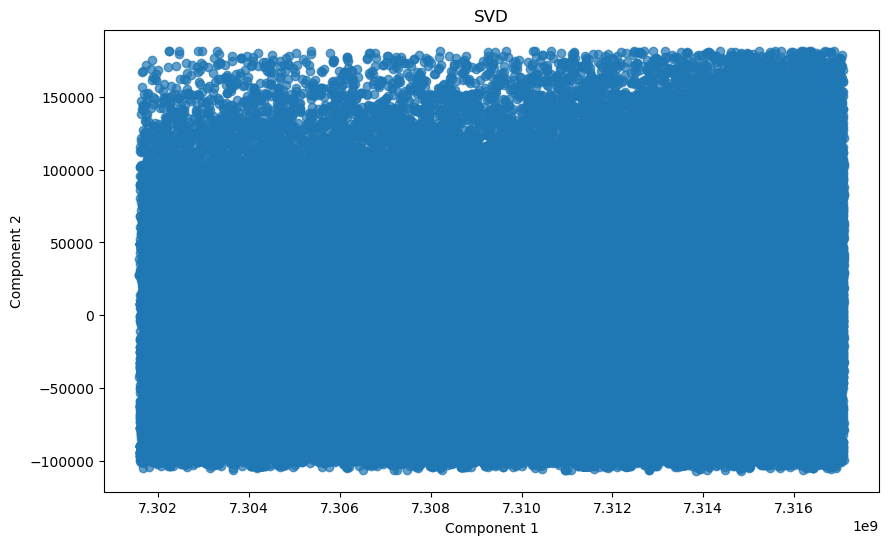

In [74]:
# SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(cars)

plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.7)
plt.title('SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.savefig('cars_svd_plot.png')
plt.savefig('../images/cars_svd_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

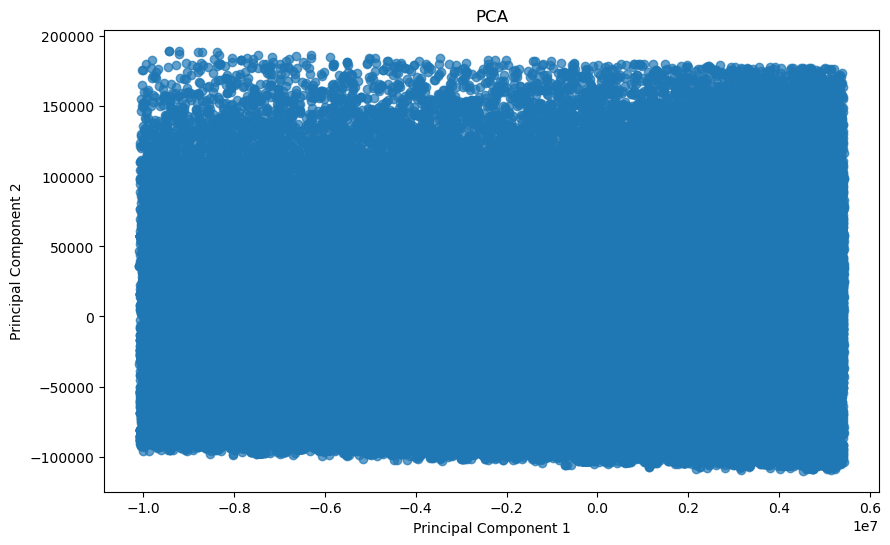

In [75]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cars)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.savefig('cars_pca_plot.png')
plt.savefig('../images/cars_pca_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

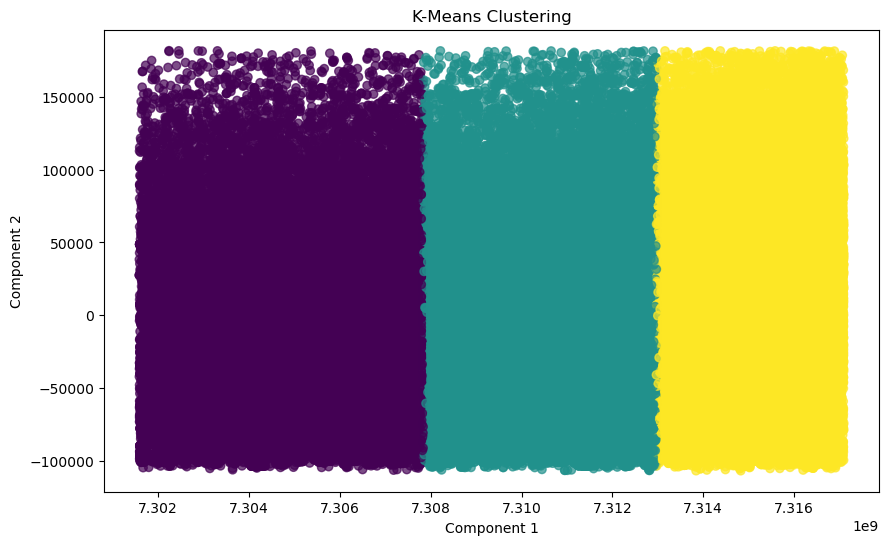

In [76]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cars)
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.savefig('cars_kmeans_plot.png')
plt.savefig('../images/cars_kmeans_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

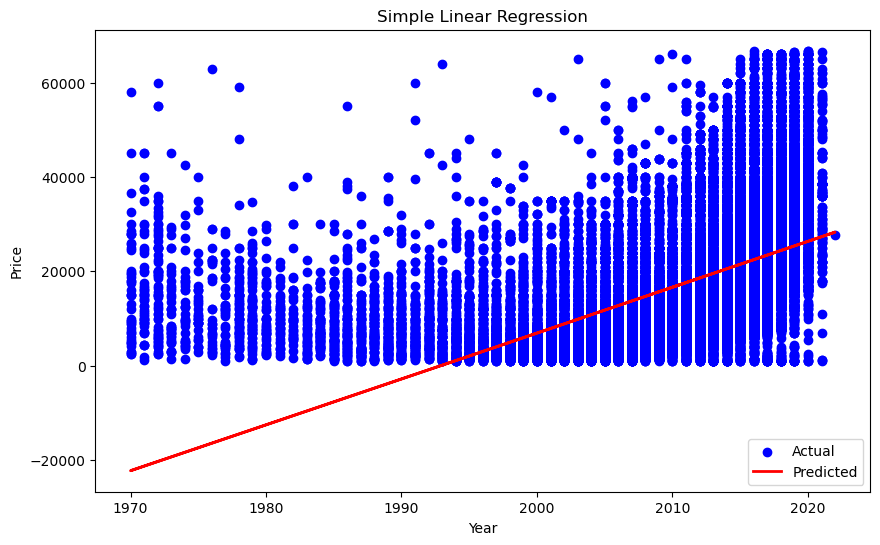

In [77]:
# Simple Linear Regression on Year
X_lr = cars[['year']]
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_cars, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
#plt.savefig('cars_simple_linear_regression_year_plot.png')
plt.savefig('../images/cars_simple_linear_regression_year_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [78]:
#Calculate MSE of Simple Linear Regression - Year
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Simple Linear Regression RMSE - Year = {lr_rmse}")

Simple Linear Regression RMSE - Year = 10974.07626262566


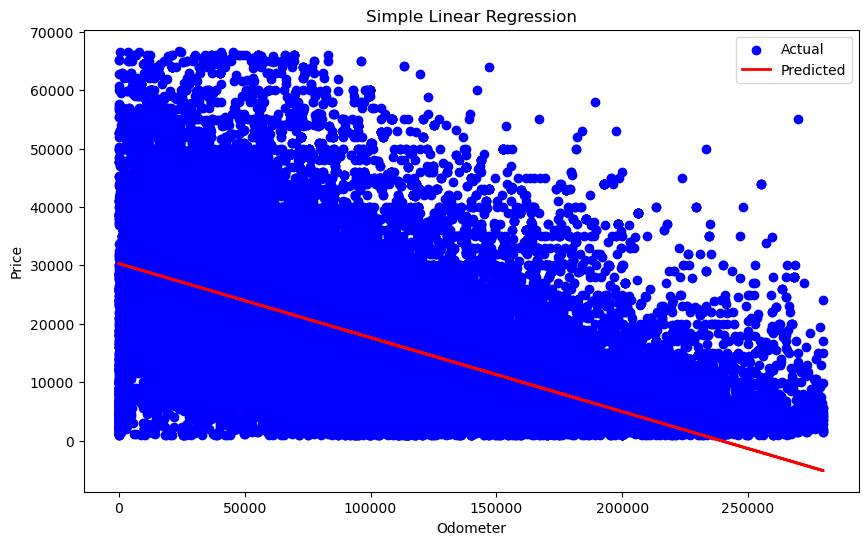

In [79]:
# Simple Linear Regression on Odometer (better values in the correlation matrix)
X_lr = cars[['odometer']]
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_cars, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
#plt.savefig('cars_simple_linear_regression_odometer_plot.png')
plt.savefig('../images/cars_simple_linear_regression_odometer_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [80]:
#Calculate MSE of Simple Linear Regression - Odometer
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Simple Linear Regression RMSE - Odometer = {lr_rmse}")

Simple Linear Regression RMSE - Odometer = 10434.112129021074


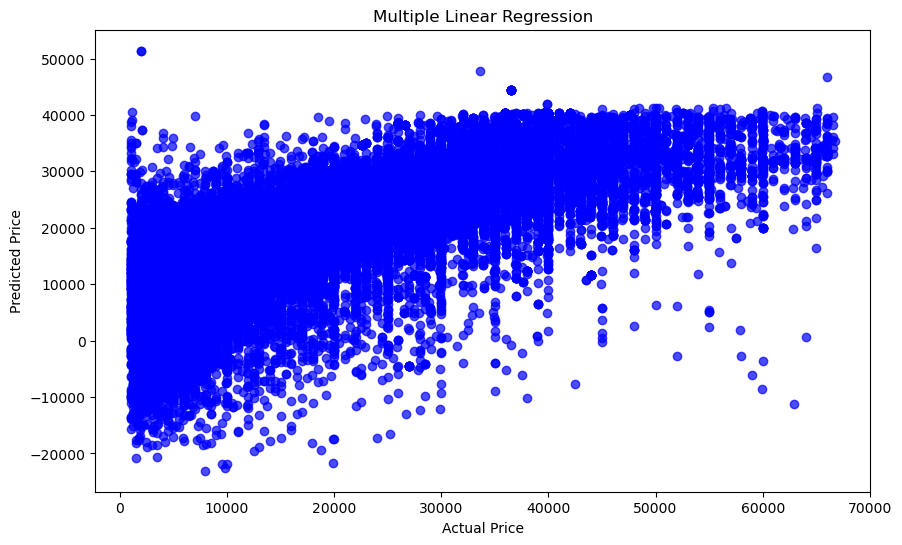

In [81]:
# Multiple Linear Regression - Price
X_train, X_test, y_train, y_test = train_test_split (X_cars, y_cars, test_size=0.3, random_state=42)
m_lr = LinearRegression()
m_lr.fit(X_train, y_train)
y_pred_m_lr = m_lr.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_m_lr, alpha=0.7, color='blue')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
#plt.savefig('cars_multiple_linear_regression_plot.png')
plt.savefig('../images/cars_multiple_linear_regression_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [82]:
#Calculate MSE of Multiple Linear Regression
m_lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_m_lr))
print(f"Multiple Linear Regression RMSE = {m_lr_rmse}")

Multiple Linear Regression RMSE = 8066.596712591628


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [83]:
# Evaluation of the models - Simple Linear Regression vs. Multiple Linear Regression
print(f"Simple Linear Regression RMSE = {lr_rmse}")
print(f"Multiple Linear Regression RMSE = {m_lr_rmse}")
if lr_rmse <= m_lr_rmse:
    print("Simple linear regression is better")
else: print("Multiple linear regression is better")

Simple Linear Regression RMSE = 10434.112129021074
Multiple Linear Regression RMSE = 8066.596712591628
Multiple linear regression is better


In [84]:
# Select relevant features and target variable
features= ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
X_cars = pd.get_dummies(cars[features], drop_first=True)
y_cars = cars['price']

In [85]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cars)

In [86]:
# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cars, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 140473, Testing set size: 60204


In [87]:
#Principal Component Analysis (PCA)
pca = PCA(n_components=0.95)  # Variance = 95%
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [88]:
#Sequential Feature Selection (SFS)
cars_model = LinearRegression()
sfs = SequentialFeatureSelector(cars_model, n_features_to_select=10, direction='forward')
sfs.fit(X_train_pca, y_train)
X_train_sfs = sfs.transform(X_train_pca)
X_test_sfs = sfs.transform(X_test_pca)

In [89]:
# Hyperparameter tuning for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), param_grid, cv=5)
lasso = GridSearchCV(Lasso(), param_grid, cv=5)

In [90]:
# Train Ridge Regression
ridge.fit(X_train_sfs, y_train)
y_pred_ridge = ridge.predict(X_test_sfs)

In [91]:
# Train Lasso Regression
lasso.fit(X_train_sfs, y_train)
y_pred_lasso = lasso.predict(X_test_sfs)

In [92]:
# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge) #MAE score evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  #MSE score evaluation
rmse_ridge = np.sqrt(mse_ridge)  #RMSE score evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)  #R2 score evaluation
print(f'Ridge - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge - Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge - R-squared (R2): {r2_ridge}')

Ridge - Mean Absolute Error (MAE): 5473.85723782673
Ridge - Mean Squared Error (MSE): 56023790.08505248
Ridge - Root Mean Squared Error (RMSE): 7484.904146684344
Ridge - R-squared (R2): 0.6643348041139558


In [93]:
# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso) #MAE score evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)  #MSE score evaluation
rmse_lasso = np.sqrt(mse_lasso)  #RMSE score evaluation
r2_lasso = r2_score(y_test, y_pred_lasso) #R2 score evaluation
print(f'Lasso - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso - Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso - R-squared (R2): {r2_lasso}')

Lasso - Mean Absolute Error (MAE): 5473.868390731633
Lasso - Mean Squared Error (MSE): 56023867.82512309
Lasso - Root Mean Squared Error (RMSE): 7484.909339806534
Lasso - R-squared (R2): 0.6643343383361855


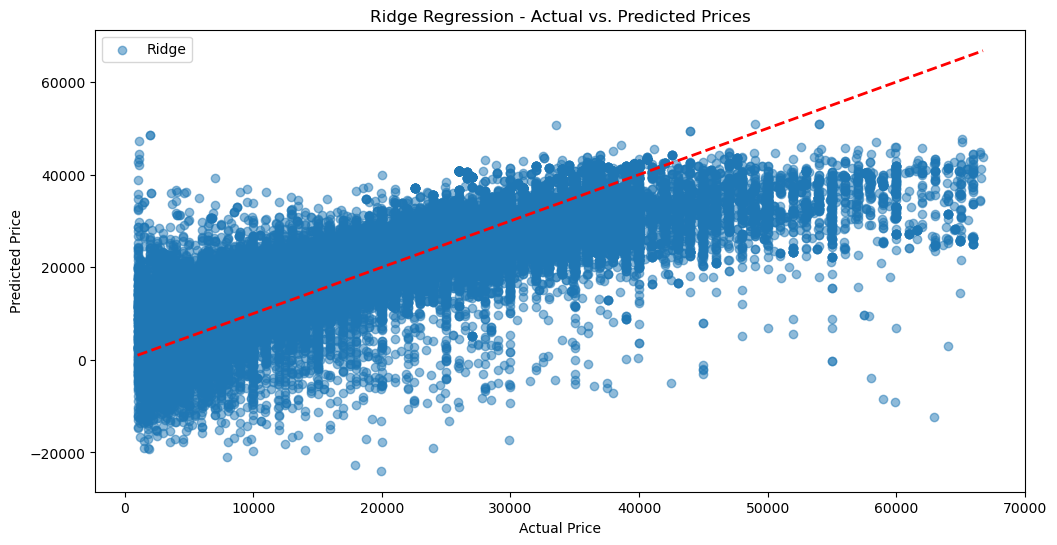

In [94]:
# Plot the actual vs. predicted prices - Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression - Actual vs. Predicted Prices')
plt.legend()
#plt.savefig('cars_ridge_regression_plot.png')
plt.savefig('../images/cars_ridge_regression_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

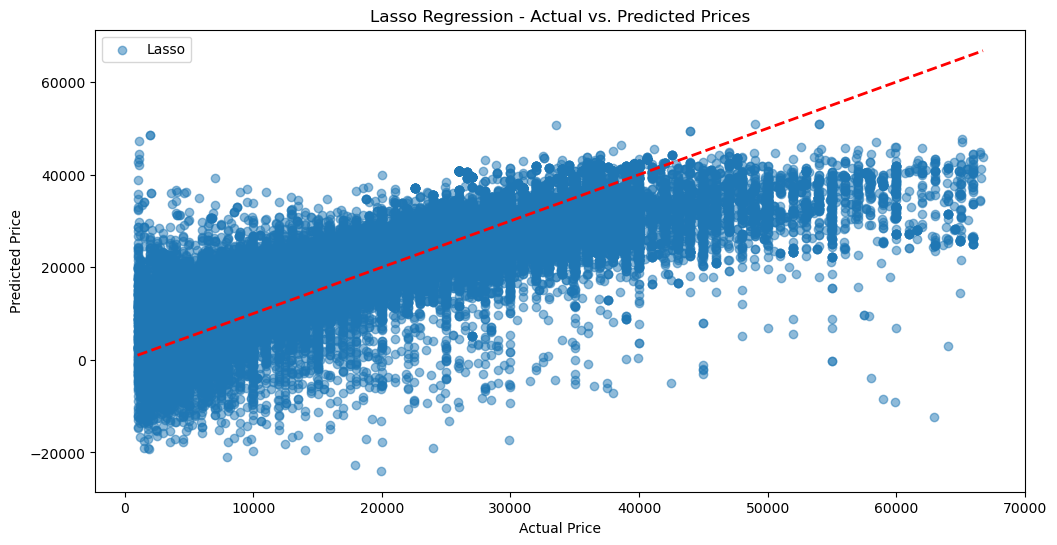

In [95]:
# Plot the actual vs. predicted prices - Lasso Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression - Actual vs. Predicted Prices')
plt.legend()
#plt.savefig('cars_lasso_regression_plot.png')
plt.savefig('../images/cars_lasso_regression_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

In [96]:
#Create a list of dictionaries with the model results - Ridge and Lasso
model_results = [
    {
        "Model Type": "Ridge",
        "MAE"       : mae_ridge,
        "MSE"       : mse_ridge,
        "RMSE"      : rmse_ridge,
        "R2"        : r2_ridge
    },
    {
        "Model Type": "Lasso",
        "MAE"       : mae_lasso,
        "MSE"       : mse_lasso,
        "RMSE"      : rmse_lasso,
        "R2"        : r2_lasso
    }
]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(model_results)

# Print the DataFrame as a formatted table with borders
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------+---------+-------------+---------+----------+
|    | Model Type   |     MAE |         MSE |    RMSE |       R2 |
+====+==============+=========+=============+=========+==========+
|  0 | Ridge        | 5473.86 | 5.60238e+07 | 7484.9  | 0.664335 |
+----+--------------+---------+-------------+---------+----------+
|  1 | Lasso        | 5473.87 | 5.60239e+07 | 7484.91 | 0.664334 |
+----+--------------+---------+-------------+---------+----------+


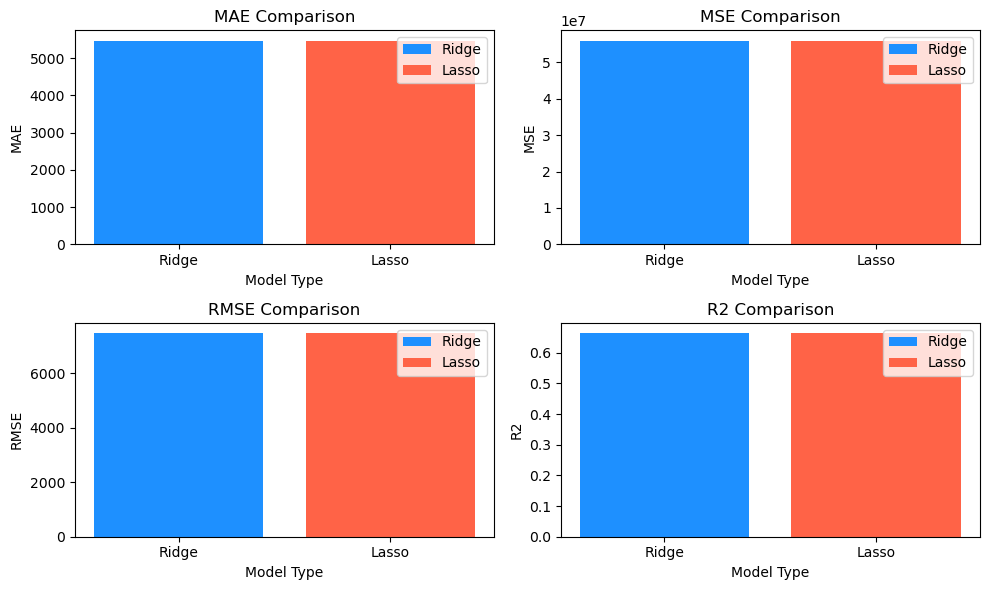

In [97]:
#Plot Model Results
# Plotting individual metrics
plt.figure(figsize=(10, 6))

# Define colors for the bars
colors = ['#1E90FF', '#FF6347']  # Dodger Blue and Tomato Red

# List of metrics to plot
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Create subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    # Plot bars with different colors for each model type
    for j, model in enumerate(df['Model Type']):
        plt.bar(model, df.loc[df['Model Type'] == model, metric].values[0], 
                color=colors[j], 
                label=model)
        
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model Type')
    plt.legend()
    
plt.tight_layout()  # Adjust layout to prevent overlap
#plt.savefig('cars_model_results_plot.png')
plt.savefig('../images/cars_model_results_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [98]:
#Visualizations for Storytelling (Basic report is in a separate file)

In [99]:
# Check the type and shape of y_test
print("Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)

# Check the type and shape of y_pred_ridge
print("Type of y_pred_ridge:", type(y_pred_ridge))
print("Shape of y_pred_ridge:", y_pred_ridge.shape)

# Check the type and shape of X_test
print("Type of X_test:", type(X_test))
print("Shape of X_test:", X_test.shape)

# Check if X_test has named fields (structured array)
if isinstance(X_test, np.ndarray) and X_test.dtype.names:
    print("X_test has named columns:", X_test.dtype.names)
else:
    print("X_test does not have named columns")

Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (60204,)
Type of y_pred_ridge: <class 'numpy.ndarray'>
Shape of y_pred_ridge: (60204,)
Type of X_test: <class 'numpy.ndarray'>
Shape of X_test: (60204, 12)
X_test does not have named columns


In [100]:
# Combine the three arrays horizontally (side by side) - actual price, predicted price and features
combined_array = np.column_stack((y_test, y_pred_ridge, X_test_orig))  #using the X_test original data before Modeling  (named X_test_orig)

# Specify Column Names
column_names = ['actual_price', 'predicted_price', 'year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Create a DataFrame
cars_df = pd.DataFrame(combined_array, columns = column_names)

# Convert numerical columns to integer
cars_df['year'] = cars_df['year'].astype(int)
cars_df['odometer'] = cars_df['odometer'].astype(int)
cars_df['cylinders'] = cars_df['cylinders'].astype(int)

# Display the DataFrame
cars_df.head(10)

actual_price predicted_price  year  odometer  cylinders manufacturer  \
0         7999    17124.701533  2009    183812          8    chevrolet   
1        22990     22062.27213  2017     46748          6        buick   
2        11515    12904.684821  2015     81171          4      hyundai   
3        18995    21764.017082  2018     30169          4       toyota   
4        19900     17481.41301  2005    116000          8          gmc   
5         5980    15586.556384  2008     89843          6        dodge   
6         8300     5177.411241  2007    179000          6    chevrolet   
7         3900     2798.834882  2004    128000          4   volkswagen   
8         6700     6892.837099  2011    131997          4         ford   
9        11900    19733.828934  2014     71481          4        mazda   

   condition    fuel title_status transmission drive       size     type  \
0    unknown     gas        clean    automatic   4wd    unknown    truck   
1       good   other        clean        other   fwd    unknown      SUV   
2  excellent     gas        clean    automatic   fwd    compact    coupe   
3   like new     gas        clean    automatic   fwd  full-size    sedan   
4  excellent  diesel      salvage    automatic   rwd  full-size    truck   
5       good     gas        clean    automatic   4wd   mid-size      SUV   
6       good     gas        clean    automatic   rwd  full-size    truck   
7  excellent     gas        clean    automatic   fwd    compact  unknown   
8  excellent     gas        clean    automatic   fwd   mid-size    sedan   
9    unknown     gas        clean       manual   fwd    unknown    sedan   

  paint_color  
0        blue  
1        blue  
2       black  
3       brown  
4       brown  
5        blue  
6       black  
7      silver  
8     unknown  
9      silver

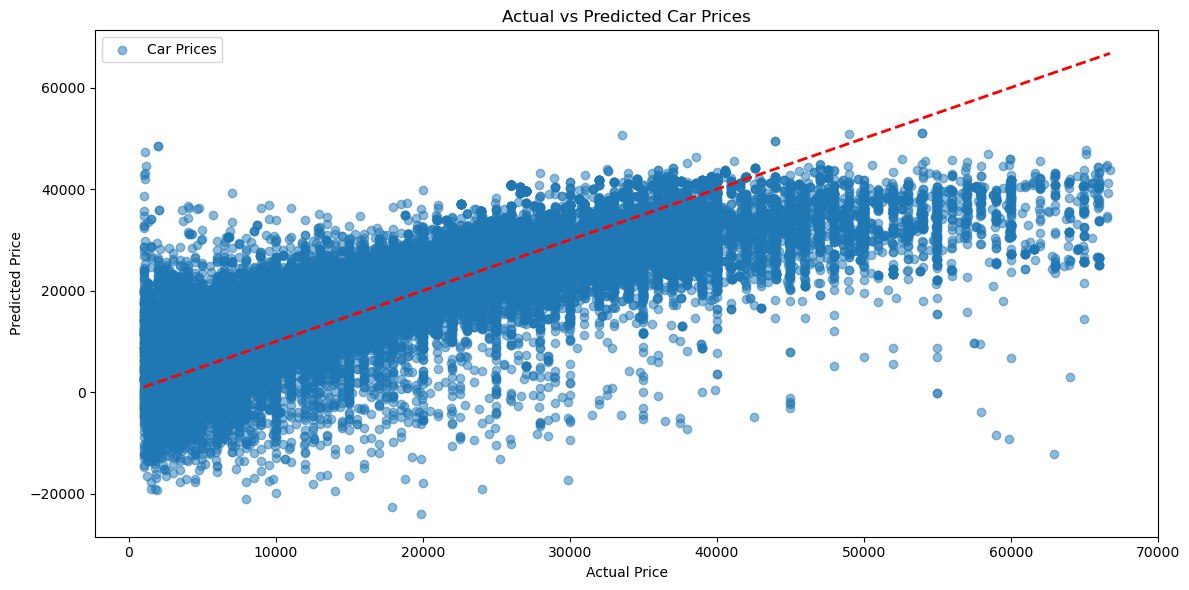

In [101]:
# 1. Scatter Plot: Actual vs Predicted Prices - Using Ridge Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.tight_layout()
#plt.savefig('01_cars_price_scatterplot.png')
plt.savefig('../images/01_cars_price_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

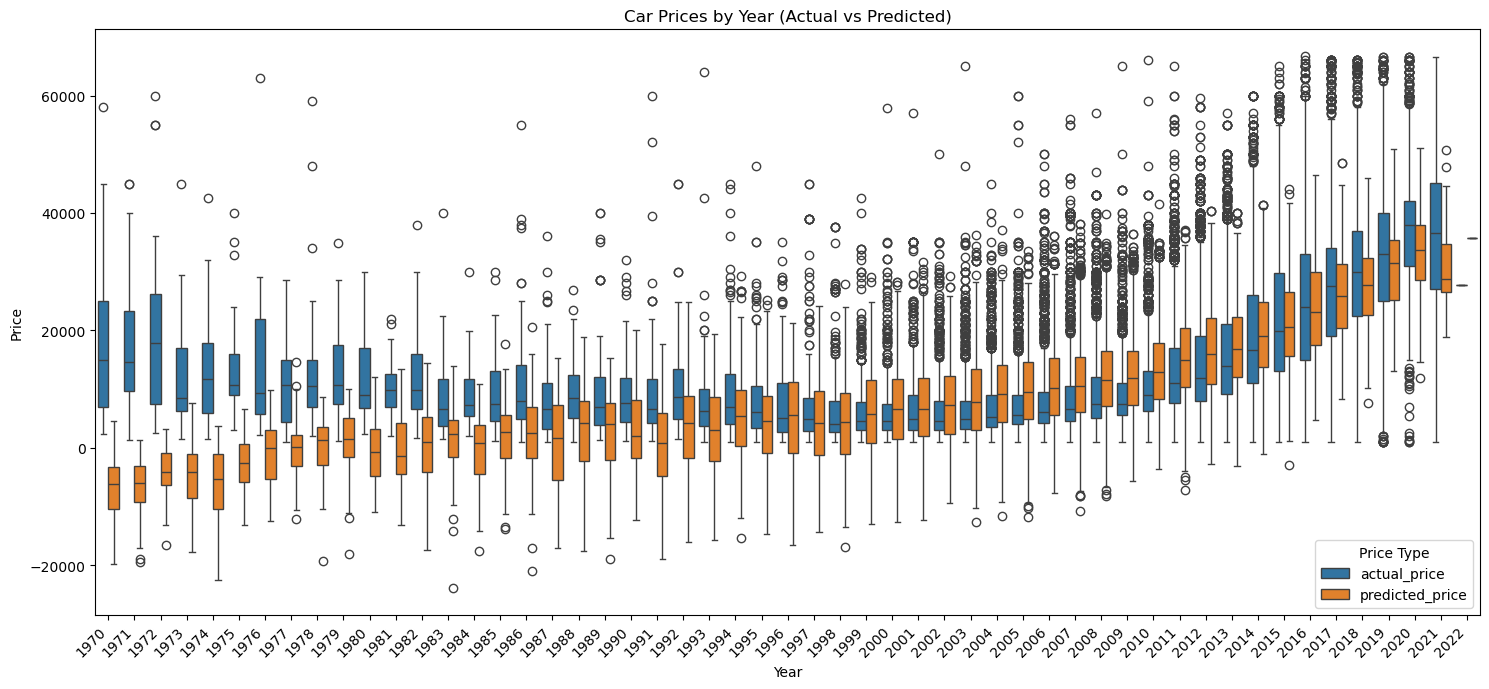

In [102]:
# 2a. Box Plot: Price Distribution by Year
year_prices = pd.melt(cars_df[['year', 'actual_price', 'predicted_price']], 
                              id_vars=['year'], 
                              value_vars=['actual_price', 'predicted_price'], 
                              var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 7))
sns.boxplot(x='year', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Year (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('02_cars_price_boxplot.png')
plt.savefig('../images/02_cars_price_scatterplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

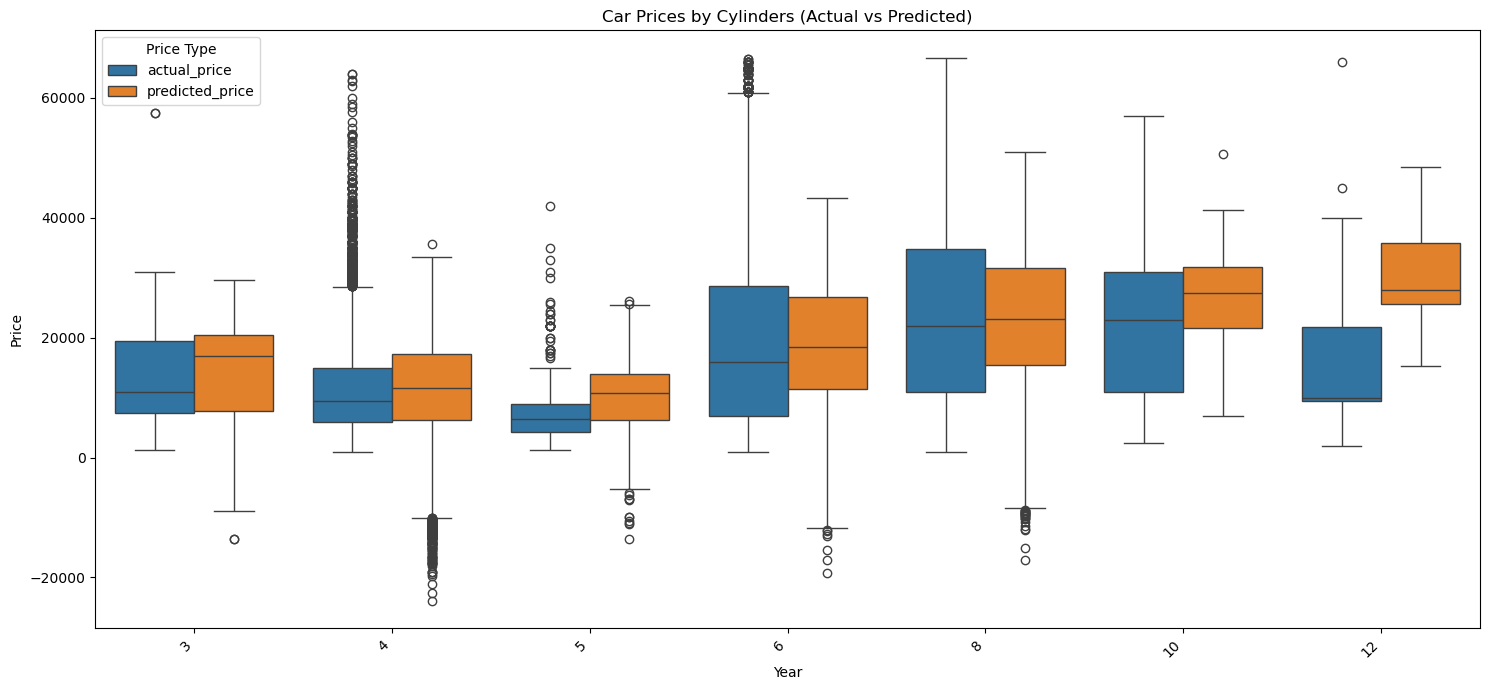

In [103]:
# 2b. Box Plot: Price Distribution by Cylinders
year_prices = pd.melt(cars_df[['cylinders', 'actual_price', 'predicted_price']], 
                              id_vars=['cylinders'], 
                              value_vars=['actual_price', 'predicted_price'], 
                              var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 7))
sns.boxplot(x='cylinders', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Cylinders (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('03_cars_price_cylinders_boxplot.png')
plt.savefig('../images/03_cars_price_cylinders_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

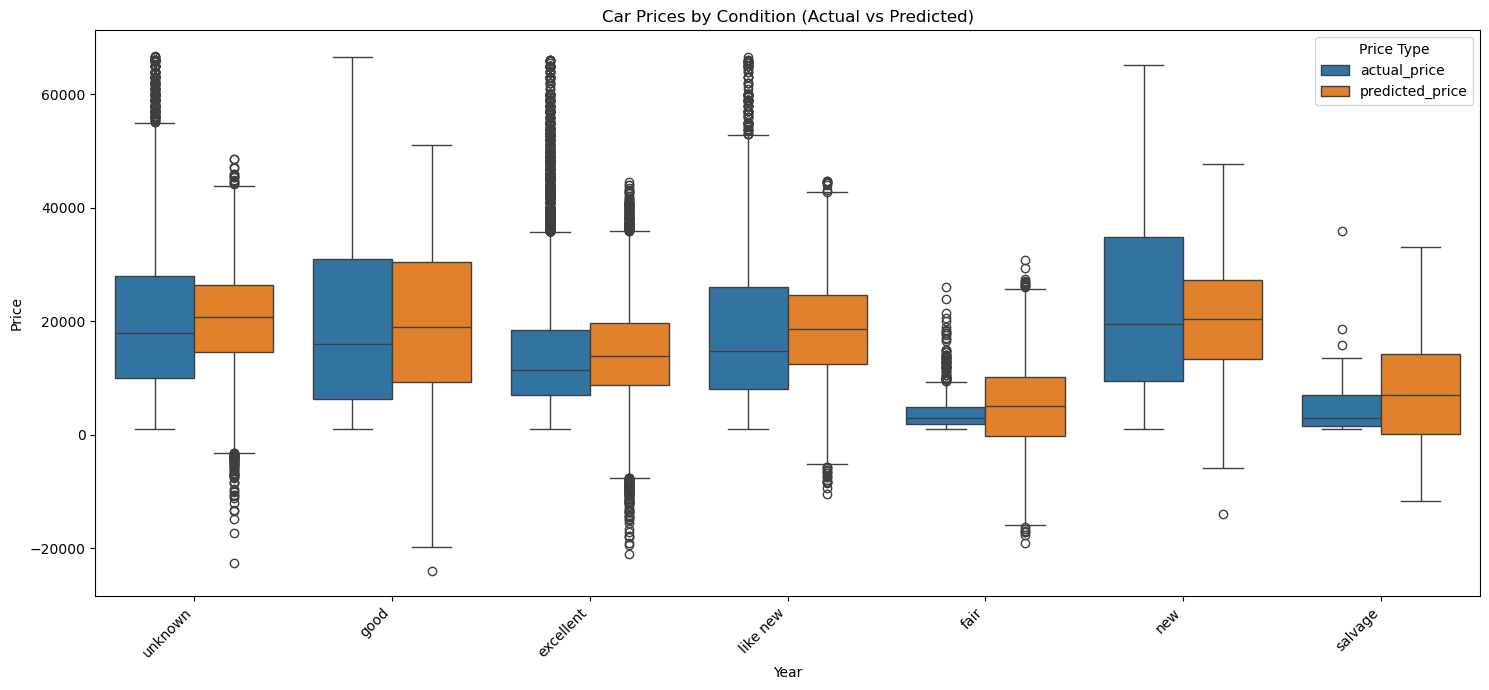

In [104]:
# 2c. Box Plot: Price Distribution by Condition
year_prices = pd.melt(cars_df[['condition', 'actual_price', 'predicted_price']], 
                              id_vars=['condition'], 
                              value_vars=['actual_price', 'predicted_price'], 
                              var_name='Price Type', value_name='Price')

plt.figure(figsize=(15, 7))
sns.boxplot(x='condition', y='Price', hue='Price Type', data=year_prices)
plt.title('Car Prices by Condition (Actual vs Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('04_cars_price_condition_boxplot.png')
plt.savefig('../images/04_cars_price_condition_boxplot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

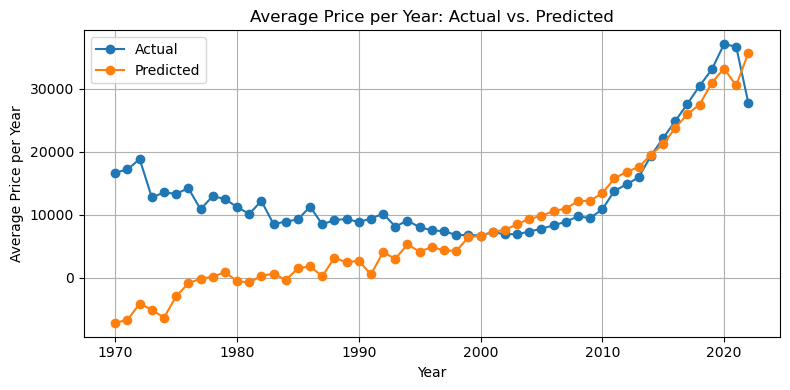

In [105]:
# 3a. Calculate average (mean) price for each year - Actual and Predicted Prices
avg_actual_price_by_year = cars_df.groupby('year')['actual_price'].mean().reset_index()
avg_pred_price_by_year = cars_df.groupby('year')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_year['year'], avg_actual_price_by_year['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_year['year'], avg_pred_price_by_year['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Year: Actual vs. Predicted')
plt.xlabel('Year')
plt.ylabel('Average Price per Year')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
#plt.savefig('05_car_average_price_per_year_plot.png', format='png')
plt.savefig('../images/05_car_average_price_per_year_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

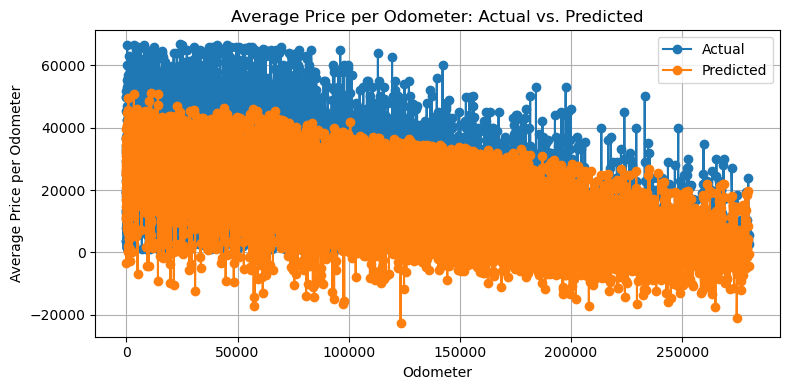

In [106]:
# 3b. Calculate average (mean) price for each range of odometer - Actual and Predicted Prices
avg_actual_price_by_odometer = cars_df.groupby('odometer')['actual_price'].mean().reset_index()
avg_pred_price_by_odometer = cars_df.groupby('odometer')['predicted_price'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(avg_actual_price_by_odometer['odometer'], avg_actual_price_by_odometer['actual_price'], marker='o', label='Actual') # 'o' adds points at each data point
plt.plot(avg_pred_price_by_odometer['odometer'], avg_pred_price_by_odometer['predicted_price'], marker='o',label='Predicted') # 'o' adds points at each data point
plt.title('Average Price per Odometer: Actual vs. Predicted')
plt.xlabel('Odometer')
plt.ylabel('Average Price per Odometer')
plt.legend()
plt.grid(True)  # adds grid lines
plt.tight_layout()
#plt.savefig('06_car_average_price_per_odometer_plot.png', format='png')
plt.savefig('../images/06_car_average_price_per_odometer_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

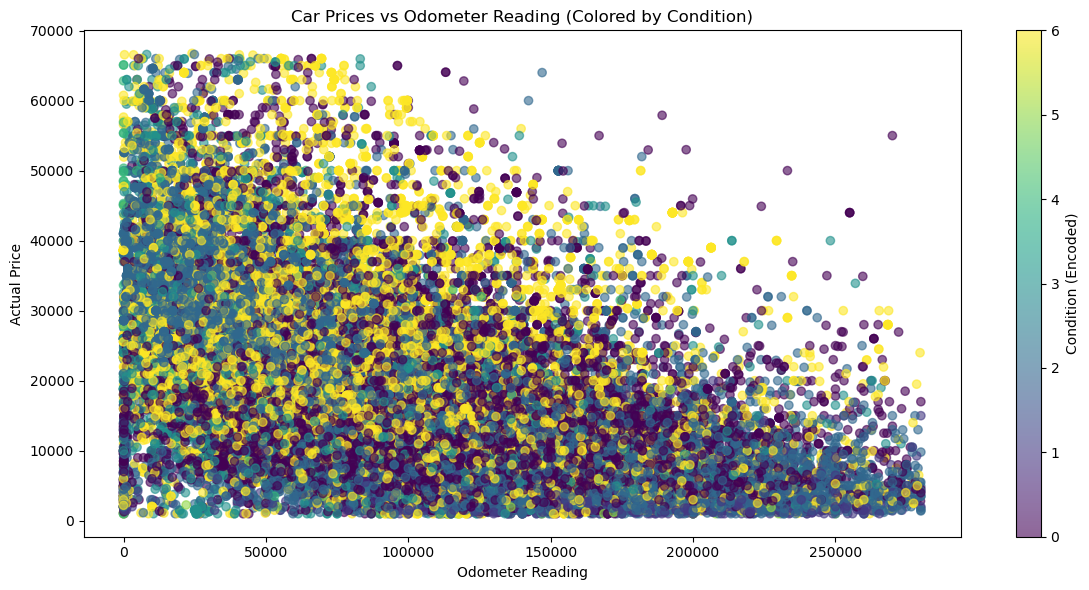

In [107]:
# 4. Scatter Plot: Price vs Odometer with Color-coded Condition
condition_codes = cars_df['condition'].astype('category').cat.codes  # Convert condition to numeric codes
plt.figure(figsize=(12, 6))
scatter = plt.scatter(cars_df['odometer'], cars_df['actual_price'], 
                      c=condition_codes, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Condition (Encoded)')
plt.title('Car Prices vs Odometer Reading (Colored by Condition)')
plt.xlabel('Odometer Reading')
plt.ylabel('Actual Price')
plt.tight_layout()
#plt.savefig('07_car_average_price_per_odometer_condition_plot.png', format='png')
plt.savefig('../images/07_car_average_price_per_odometer_condition_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

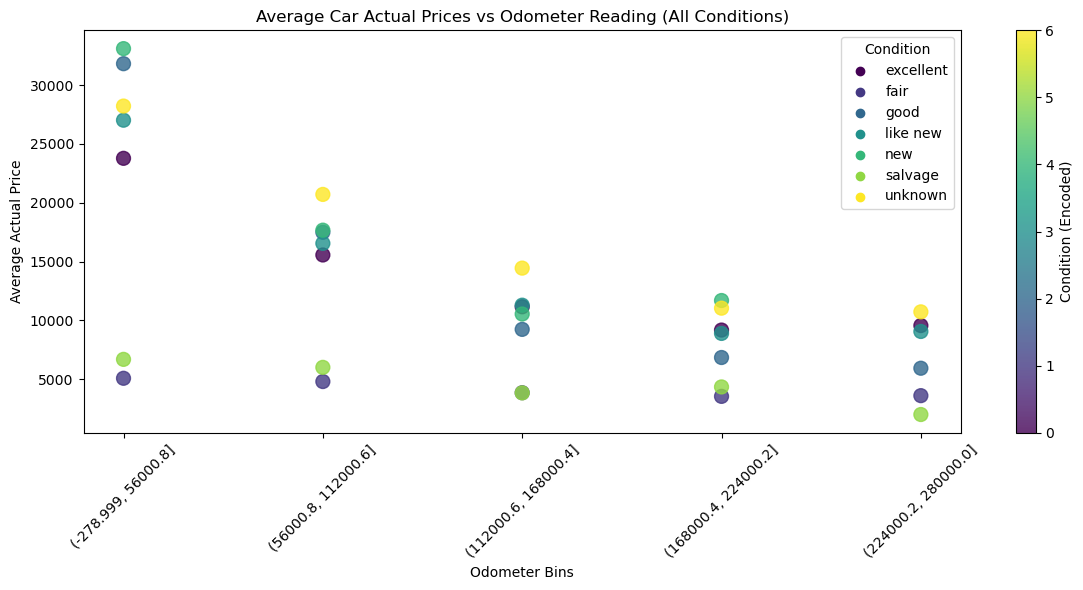

In [108]:
# 5a. Group by Odometer (or bins of odometer) and Condition - Actual Prices
cars_df['odometer_bin'] = pd.cut(cars_df['odometer'], bins=5)  # Create bins for odometer values
grouped_actual = cars_df.groupby(['odometer_bin', 'condition']).agg({
    'actual_price': 'mean'
}).reset_index()

# Convert condition to numeric codes for coloring
grouped_actual['condition_code'] = grouped_actual['condition'].astype('category').cat.codes

# Scatter plot with average prices for all conditions
plt.figure(figsize=(12, 6))
scatter_actual = plt.scatter(grouped_actual['odometer_bin'].astype(str), grouped_actual['actual_price'], 
                      c=grouped_actual['condition_code'], cmap='viridis', s=100, alpha=0.8)

# Add color bar for condition (optional)
plt.colorbar(scatter_actual,  label='Condition (Encoded)')

# Add titles and labels
plt.title('Average Car Actual Prices vs Odometer Reading (All Conditions)')
plt.xlabel('Odometer Bins')
plt.ylabel('Average Actual Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually add a legend for all conditions
unique_conditions_actual = grouped_actual['condition'].unique()
colors = plt.cm.viridis(grouped_actual['condition_code'].unique() / grouped_actual['condition_code'].max())
for condition, color in zip(unique_conditions_actual, colors):
    plt.scatter([], [], color=color, label=condition)  # Add an invisible scatter point for the legend
    
plt.legend(title='Condition', loc='upper right')  # Add legend to the plot

plt.tight_layout()
#plt.savefig('08_car_average_actual_price_per_odometer_condition_plot.png', format='png')
plt.savefig('../images/08_car_average_actual_price_per_odometer_condition_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()

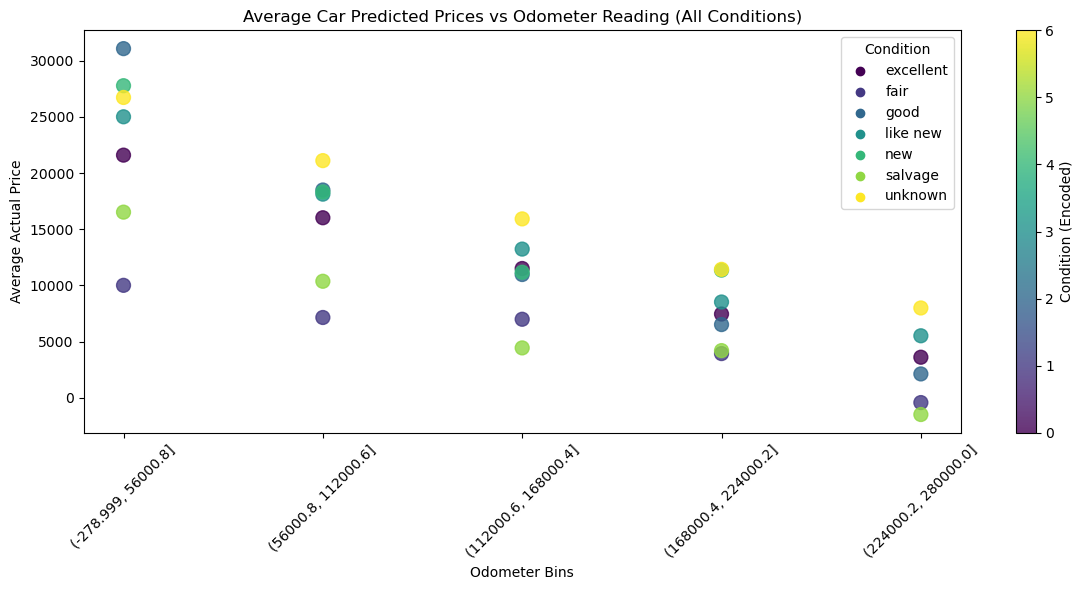

In [109]:
# 5b. Group by Odometer (or bins of odometer) and Condition - Predicted Prices
cars_df['odometer_bin'] = pd.cut(cars_df['odometer'], bins=5)  # Create bins for odometer values
grouped_predict = cars_df.groupby(['odometer_bin', 'condition']).agg({
    'predicted_price': 'mean'
}).reset_index()

# Convert condition to numeric codes for coloring
grouped_predict['condition_code'] = grouped_predict['condition'].astype('category').cat.codes

# Scatter plot with average prices for all conditions
plt.figure(figsize=(12, 6))
scatter_predict = plt.scatter(grouped_predict['odometer_bin'].astype(str), grouped_predict['predicted_price'], 
                      c=grouped_predict['condition_code'], cmap='viridis', s=100, alpha=0.8)

# Add color bar for condition (optional)
plt.colorbar(scatter_predict, label='Condition (Encoded)')

# Add titles and labels
plt.title('Average Car Predicted Prices vs Odometer Reading (All Conditions)')
plt.xlabel('Odometer Bins')
plt.ylabel('Average Actual Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Manually add a legend for all conditions
unique_conditions_predict = grouped_predict['condition'].unique()
colors = plt.cm.viridis(grouped_predict['condition_code'].unique() / grouped_predict['condition_code'].max())
for condition, color in zip(unique_conditions_predict, colors):
    plt.scatter([], [], color=color, label=condition)  # Add an invisible scatter point for the legend
    
plt.legend(title='Condition', loc='upper right')  # Add legend to the plot

plt.tight_layout()
#plt.savefig('09_car_average_predicted_price_per_odometer_condition_plot.png', format='png')
plt.savefig('../images/09_car_average_predicted_price_per_odometer_condition_plot.png') #adjust folder when fisnihed using the GIT structure
plt.show()